In [560]:
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import os
import seaborn as sns
#import geopandas as gp
import shapely
from datetime import datetime
import datetime as dt
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix




## Focusing on the disparity between US Millitary spending and the rest of the world, and can a correlation be found between spending and Presidential approval rating?

In [561]:
%matplotlib inline

In [562]:
plt.rcParams['figure.figsize'] = (50,25)

In [563]:
saved_style_state = matplotlib.rcParams.copy()

In [564]:
notCountries = [
    "Europe", 
    "Africa", 
    "North Africa", 
    "Asia & Oceania", 
    "Americas", 
    "Central America and the Caribbean", 
    "North America", 
    "Central Asia", 
    "South Asia", 
    "South-East Asia", 
    "Oceania", 
    "Europe", 
    "Eastern Europe", 
    "Western Europe", 
    "Middle East"
    ]

In [565]:
def clean_out_xxx(value):
    try:
        return float(value)
    except:
        return np.nan




In [566]:
############################### CURRENT USD ################################

currentUSD = pd.read_excel("MilitarySpending.xlsx", sheet_name="Current USD", skiprows=5, skipfooter=8, index_col="Country")

currentUSD.columns = [currentUSD.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in currentUSD.columns[1:]]


currentUSD.drop(notCountries, axis="index", inplace=True)
currentUSD.drop(['Notes'], axis="columns", inplace=True)


currentUSD =  currentUSD.transpose()

for colName in currentUSD.columns:
        currentUSD[colName] = currentUSD[colName].apply(clean_out_xxx)
currentUSD.head(10)


Country              Algeria  Libya    Morocco   Tunisia  Sub-Saharan  Angola  \
1949-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1950-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1951-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1952-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1953-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1954-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1955-01-01 00:00:00      NaN    NaN        NaN       NaN          NaN     NaN   
1956-01-01 00:00:00      NaN    NaN  23.714286  3.714286          NaN     NaN   
1957-01-01 00:00:00      NaN    NaN  35.401980  6.411150          NaN     NaN   
1958-01-01 00:00:00      NaN    NaN  41.692278  9.523810          NaN     NaN   

Country              Benin  Botswana  Burkina Faso  Burundi  ...  Kuwait  \
1949-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1950-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1951-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1952-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1953-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1954-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1955-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1956-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1957-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   
1958-01-01 00:00:00    NaN       NaN           NaN      NaN  ...     NaN   

Country                Lebanon  Oman  Qatar  Saudi Arabia      Syria  \
1949-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1950-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1951-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1952-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1953-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1954-01-01 00:00:00        NaN   NaN    NaN           NaN        NaN   
1955-01-01 00:00:00  12.523077   NaN    NaN           NaN        NaN   
1956-01-01 00:00:00  18.062500   NaN    NaN           NaN  55.586592   
1957-01-01 00:00:00  18.654783   NaN    NaN           NaN  48.324022   
1958-01-01 00:00:00  21.769656   NaN    NaN          71.2  81.005587   

Country                  Turkey  UAE  Yemen  Yemen, North  
1949-01-01 00:00:00  197.681860  NaN    NaN           NaN  
1950-01-01 00:00:00  212.970206  NaN    NaN           NaN  
1951-01-01 00:00:00  231.813980  NaN    NaN           NaN  
1952-01-01 00:00:00  257.768613  NaN    NaN           NaN  
1953-01-01 00:00:00  294.033990  NaN    NaN           NaN  
1954-01-01 00:00:00  332.077082  NaN    NaN           NaN  
1955-01-01 00:00:00  382.919718  NaN    NaN           NaN  
1956-01-01 00:00:00  412.074237  NaN    NaN           NaN  
1957-01-01 00:00:00  450.117329  NaN    NaN           NaN  
1958-01-01 00:00:00  523.131673  NaN    NaN           NaN  

[10 rows x 177 columns]

In [567]:
############################### PER CAPITA #################################

perCapita = pd.read_excel("MilitarySpending.xlsx", sheet_name="Per capita", skiprows=6, skipfooter=8, index_col="Country")

perCapita.columns = [perCapita.columns[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in perCapita.columns[1:]]


perCapita.drop(notCountries, axis="index", inplace=True)
perCapita.drop(['Notes'], axis="columns", inplace=True)


perCapita =  perCapita.transpose()

for colName in perCapita.columns:
        perCapita[colName] = perCapita[colName].apply(clean_out_xxx)

perCapita.head(5)


Country                Algeria  Libya    Morocco    Tunisia  Sub-Saharan  \
1988-01-01 00:00:00  42.081232    NaN  38.373695  29.557170          NaN   
1989-01-01 00:00:00  34.027500    NaN  40.670487  29.039194          NaN   
1990-01-01 00:00:00  35.105153    NaN  43.120918  30.070441          NaN   
1991-01-01 00:00:00  21.404850    NaN  45.464260  30.901238          NaN   
1992-01-01 00:00:00  38.970282    NaN  47.781376  33.629207          NaN   

Country                  Angola     Benin    Botswana  Burkina Faso   Burundi  \
1988-01-01 00:00:00  132.758964  7.903450   78.117827      6.843555  6.627483   
1989-01-01 00:00:00  170.108786  5.918218   82.603244      7.787637  7.142037   
1990-01-01 00:00:00  147.796780  6.591818  121.430046      9.586334  7.281237   
1991-01-01 00:00:00   84.191046       NaN  129.884989      7.680097  7.682363   
1992-01-01 00:00:00   62.741263       NaN  130.532229      7.649325  6.857093   

Country              ...      Jordan       Kuwait     Lebanon        Oman  \
1988-01-01 00:00:00  ...  180.490405   837.469073   14.645214  684.632418   
1989-01-01 00:00:00  ...  112.637107   992.165829         NaN  672.841566   
1990-01-01 00:00:00  ...   90.420396  4276.868524   76.474703  799.002833   
1991-01-01 00:00:00  ...  115.216740  6362.623470   78.539799  662.602854   
1992-01-01 00:00:00  ...   92.452557  3302.619473  143.942518  764.980875   

Country                    Qatar  Saudi Arabia       Syria      Turkey  UAE  \
1988-01-01 00:00:00  2214.902122    886.170803  317.670639   51.175959  NaN   
1989-01-01 00:00:00  1837.737906    813.840895  122.814457   63.664536  NaN   
1990-01-01 00:00:00  1660.378360   1007.495520  131.910620   98.576411  NaN   
1991-01-01 00:00:00  1837.743956    975.124550  225.807112  103.402717  NaN   
1992-01-01 00:00:00          NaN    888.766171  225.708589  110.458542  NaN   

Country                   Yemen  
1988-01-01 00:00:00         NaN  
1989-01-01 00:00:00         NaN  
1990-01-01 00:00:00   68.921572  
1991-01-01 00:00:00   83.580499  
1992-01-01 00:00:00  100.886536  

[5 rows x 175 columns]

In [568]:
########################################### SHARE OF GVT SPENDING #################################################

shareGVT = pd.read_excel("MilitarySpending.xlsx", sheet_name="Share of Govt. spending", skiprows=7, skipfooter=6, index_col='Country')



#shareGVT.index = pd.to_datetime(shareGVT.index)

shareGVT.drop(notCountries, axis="index", inplace=True)
shareGVT.drop(['Notes'], axis="columns", inplace=True)
shareGVT.drop(['Reporting year'], axis="columns", inplace=True)

shareGVT = shareGVT.transpose()

#shareGVT.iloc = [shareGVT.iloc[0]] + [pd.Timestamp(year=y, month=1, day=1) for y in shareGVT.iloc[1:]]






for colName in shareGVT.columns:
        shareGVT[colName] = shareGVT[colName].apply(clean_out_xxx)

#for y in shareGVT.columns[1:]:
# print (y)

shareGVT.head(5)

Country   Algeria  Libya   Morocco   Tunisia  Sub-Saharan  Angola     Benin  \
1988          NaN    NaN       NaN       NaN          NaN     NaN       NaN   
1989          NaN    NaN       NaN       NaN          NaN     NaN  0.104652   
1990     0.056826    NaN  0.145002       NaN          NaN     NaN  0.092393   
1991     0.043563    NaN  0.158037  0.063269          NaN     NaN       NaN   
1992     0.074500    NaN  0.151130  0.063291          NaN     NaN       NaN   

Country  Botswana  Burkina Faso   Burundi  ...   Lebanon      Oman     Qatar  \
1988     0.100249      0.119914       NaN  ...       NaN       NaN       NaN   
1989     0.095892      0.160145       NaN  ...       NaN       NaN       NaN   
1990     0.102721      0.131448  0.172819  ...  0.191443  0.296130  0.252522   
1991     0.104205      0.116171  0.163793  ...  0.146808  0.257732  0.279046   
1992     0.099841      0.112465  0.118531  ...  0.224036  0.264798       NaN   

Country  Saudi Arabia     Syria  Turkey  UAE     Yemen  Yemen, North  NaN  
1988              NaN       NaN     NaN  NaN       NaN           NaN  NaN  
1989              NaN       NaN     NaN  NaN       NaN           NaN  NaN  
1990         0.354436  0.242995     NaN  NaN  0.245953           NaN  NaN  
1991         0.354436  0.304268     NaN  NaN  0.283364           NaN  NaN  
1992         0.272551  0.263180     NaN  NaN  0.295454           NaN  NaN  

[5 rows x 177 columns]

In [569]:
################# Kennedy #################
JohnKennedy = pd.read_excel("BushApprocal.xlsx", sheet_name="John F. Kennedy", index_col="Start Date")
JohnKennedy.drop(['End Date'], axis="columns", inplace=True)

################# Johnson ################
Johnson = pd.read_excel("BushApprocal.xlsx", sheet_name="Lyndon B. Johnson", index_col="Start Date")
Johnson.drop(['End Date'], axis="columns", inplace=True)

################## NIXON ######################
Nixon = pd.read_excel("BushApprocal.xlsx", sheet_name="Richard Nixon", index_col="Start Date")
Nixon.drop(['End Date'], axis="columns", inplace=True)

################### FORD #########################
Ford = pd.read_excel("BushApprocal.xlsx", sheet_name="Gerald R. Ford", index_col="Start Date")
Ford.drop(['End Date'], axis="columns", inplace=True)

################### Carter #########################
Carter = pd.read_excel("BushApprocal.xlsx", sheet_name="Jimmy Carter", index_col="Start Date")
Carter.drop(['End Date'], axis="columns", inplace=True)

################### Ragen #########################
Reagan = pd.read_excel("BushApprocal.xlsx", sheet_name="Ronald Reagan", index_col="Start Date")
Reagan.drop(['End Date'], axis="columns", inplace=True)

######################### G BUSH #####################
gBush = pd.read_excel("BushApprocal.xlsx", sheet_name="George Bush", index_col="Start Date")
gBush.drop(['End Date'], axis="columns", inplace=True)

######################### Clinton #####################
Clinton = pd.read_excel("BushApprocal.xlsx", sheet_name="William J. Clinton", index_col="Start Date")
Clinton.drop(['End Date'], axis="columns", inplace=True)

######################## GEORGE W APPROVAL #####################
bushWApproval = pd.read_excel("BushApprocal.xlsx", sheet_name="George W. Bush", index_col = 'Start Date')
bushWApproval.drop(['End Date'], axis="columns", inplace=True)

################### OBAMA APPROVAL #######################
obamaApproval = pd.read_excel("BushApprocal.xlsx", sheet_name="Barack Obama", index_col="Start Date")
obamaApproval.drop(['End Date'], axis="columns", inplace=True)

################# TRUMP APPROVAL #################
trumpApproval = pd.read_excel("BushApprocal.xlsx", sheet_name="Donald Trump", index_col="Start Date")
trumpApproval.drop(['End Date'], axis="columns", inplace=True)






In [570]:
def bigTotalGraph():
    UCA_usd = currentUSD[['USA', 'China', 'Australia', 'France', 'Japan', 'UK']]
    USA = currentUSD[['USA']]

    #fig, ax = plt.subplots()
    ax = UCA_usd.plot(kind='area', stacked=False)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.xlim([pd.Timestamp("1949-01-10"), pd.Timestamp("2020-01-01")])
    plt.ylabel('Spending in $Billion', size=20)
    plt.xlabel('Year', size=20)
    plt.title('Total Millitary Spending \n USA, China, Australia, France, Japan and UK', size=25)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
 

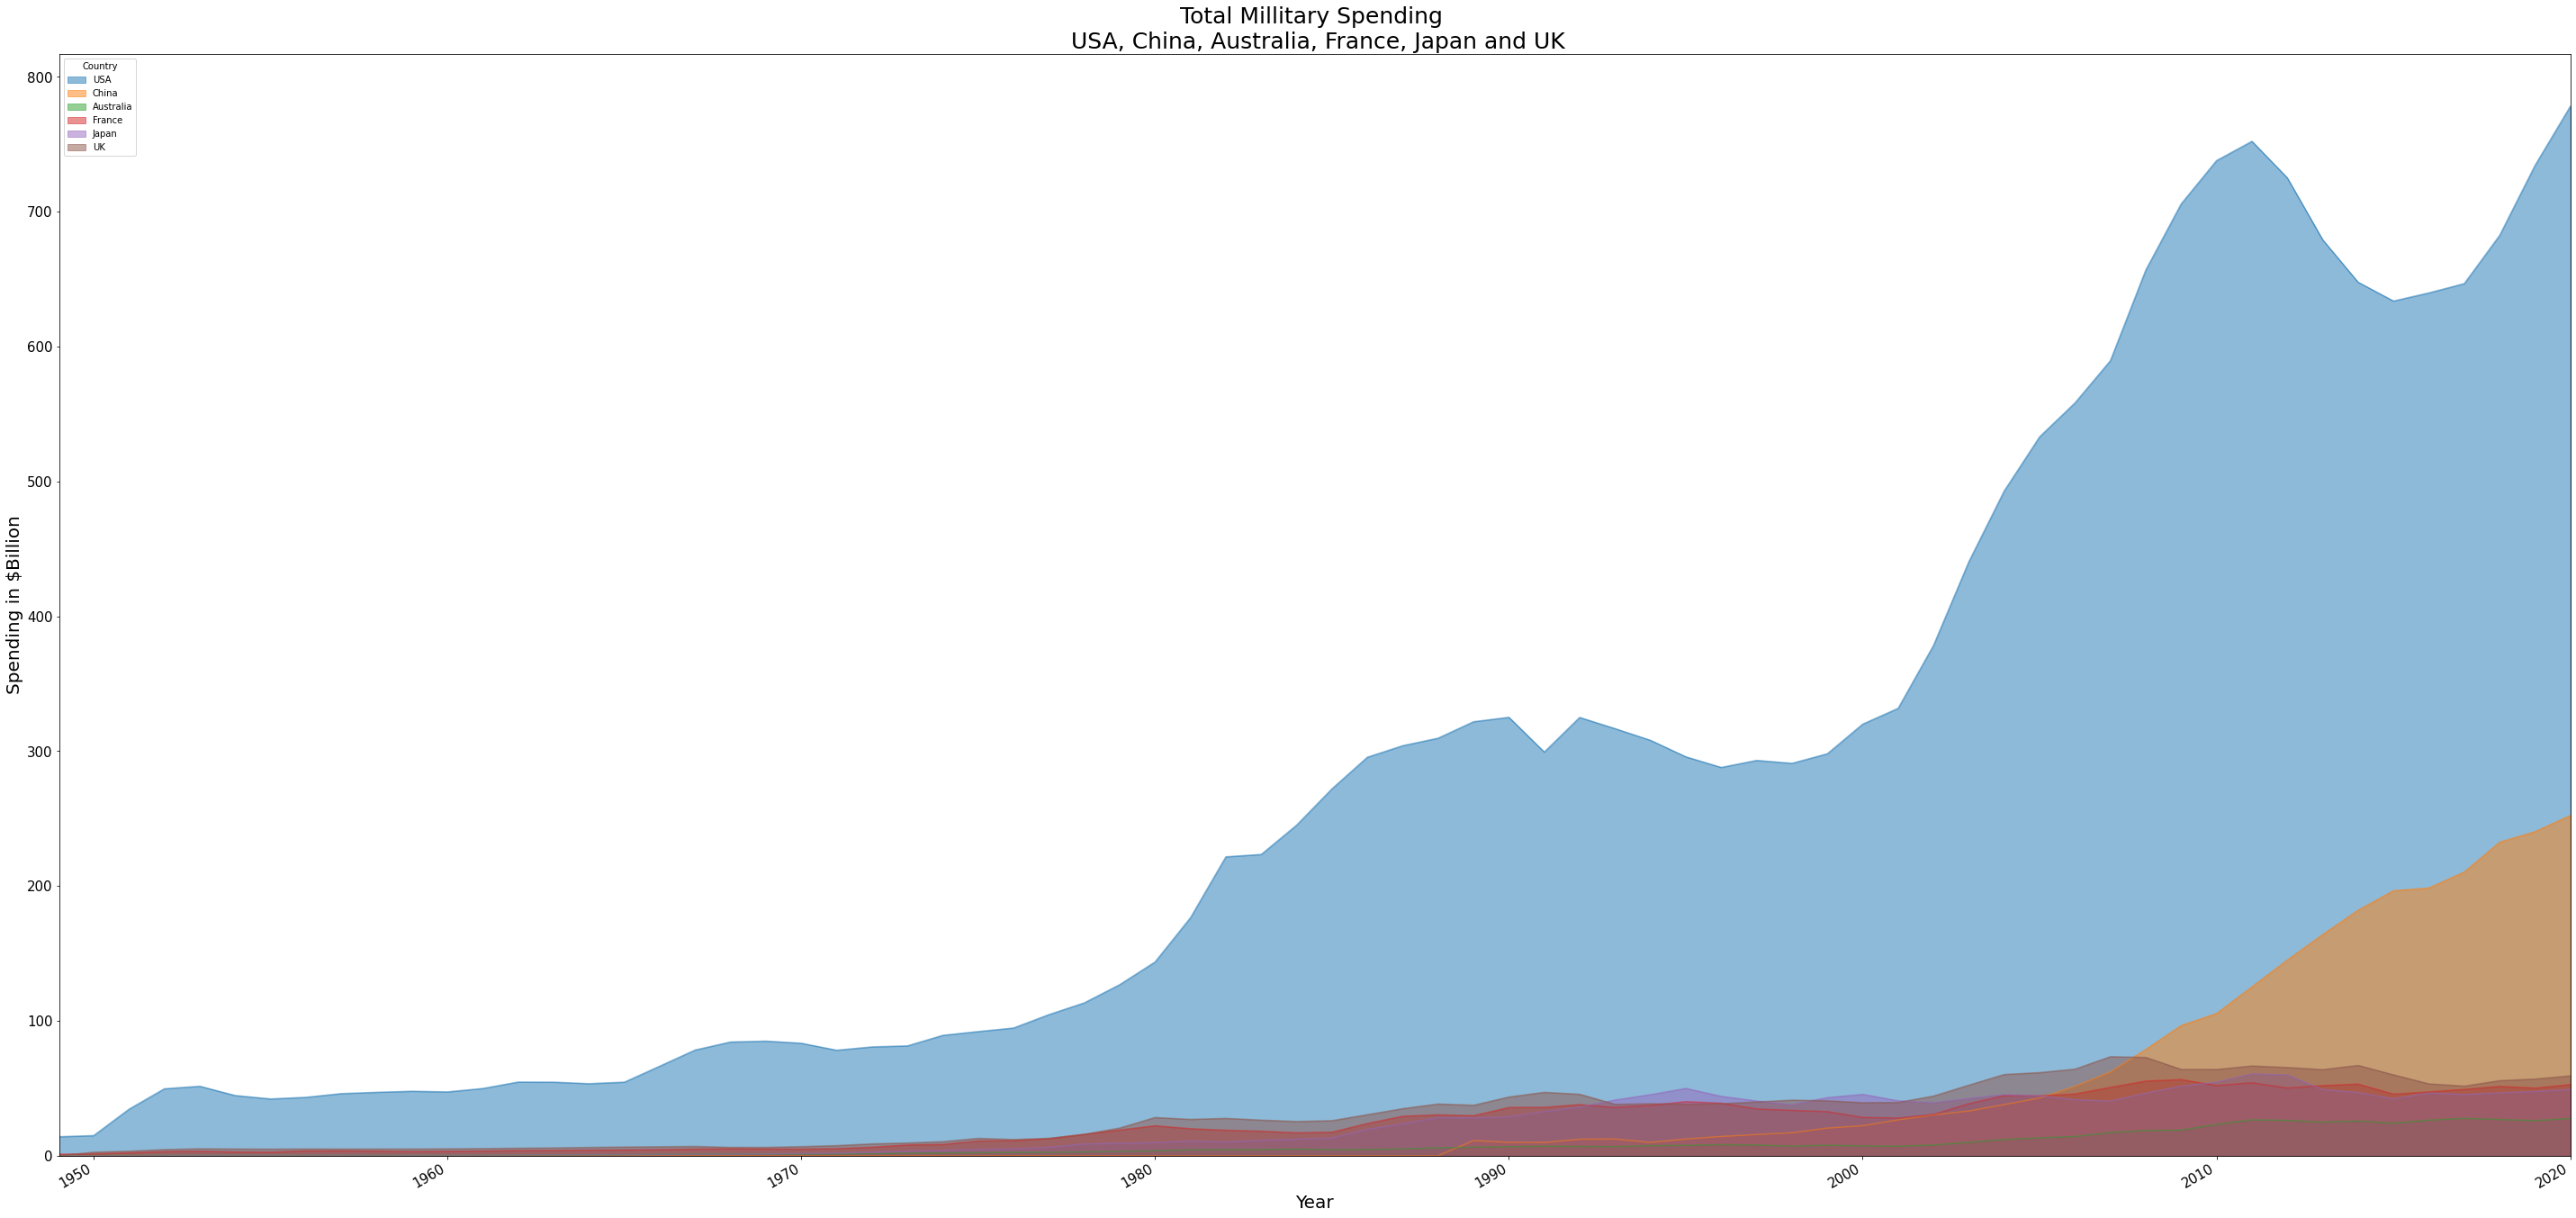

In [571]:
bigTotalGraph()

In [572]:
def combinedStack():

    UCA_usd = currentUSD[['Australia', 'France', 'Japan', 'UK', 'India', 'Russia', 'Germany']]
    USA = currentUSD[['USA']]

    #fig, ax = plt.subplots()
    ax = UCA_usd.plot(kind='area', stacked=True)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.xlim([pd.Timestamp("1980-01-10"), pd.Timestamp("2020-01-01")])
    plt.ylim(0, 400000)
    plt.ylabel('Spending in $Billion', size=20)
    plt.xlabel('Year', size=20)
    plt.title('Total Millitary Spending', size=25)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

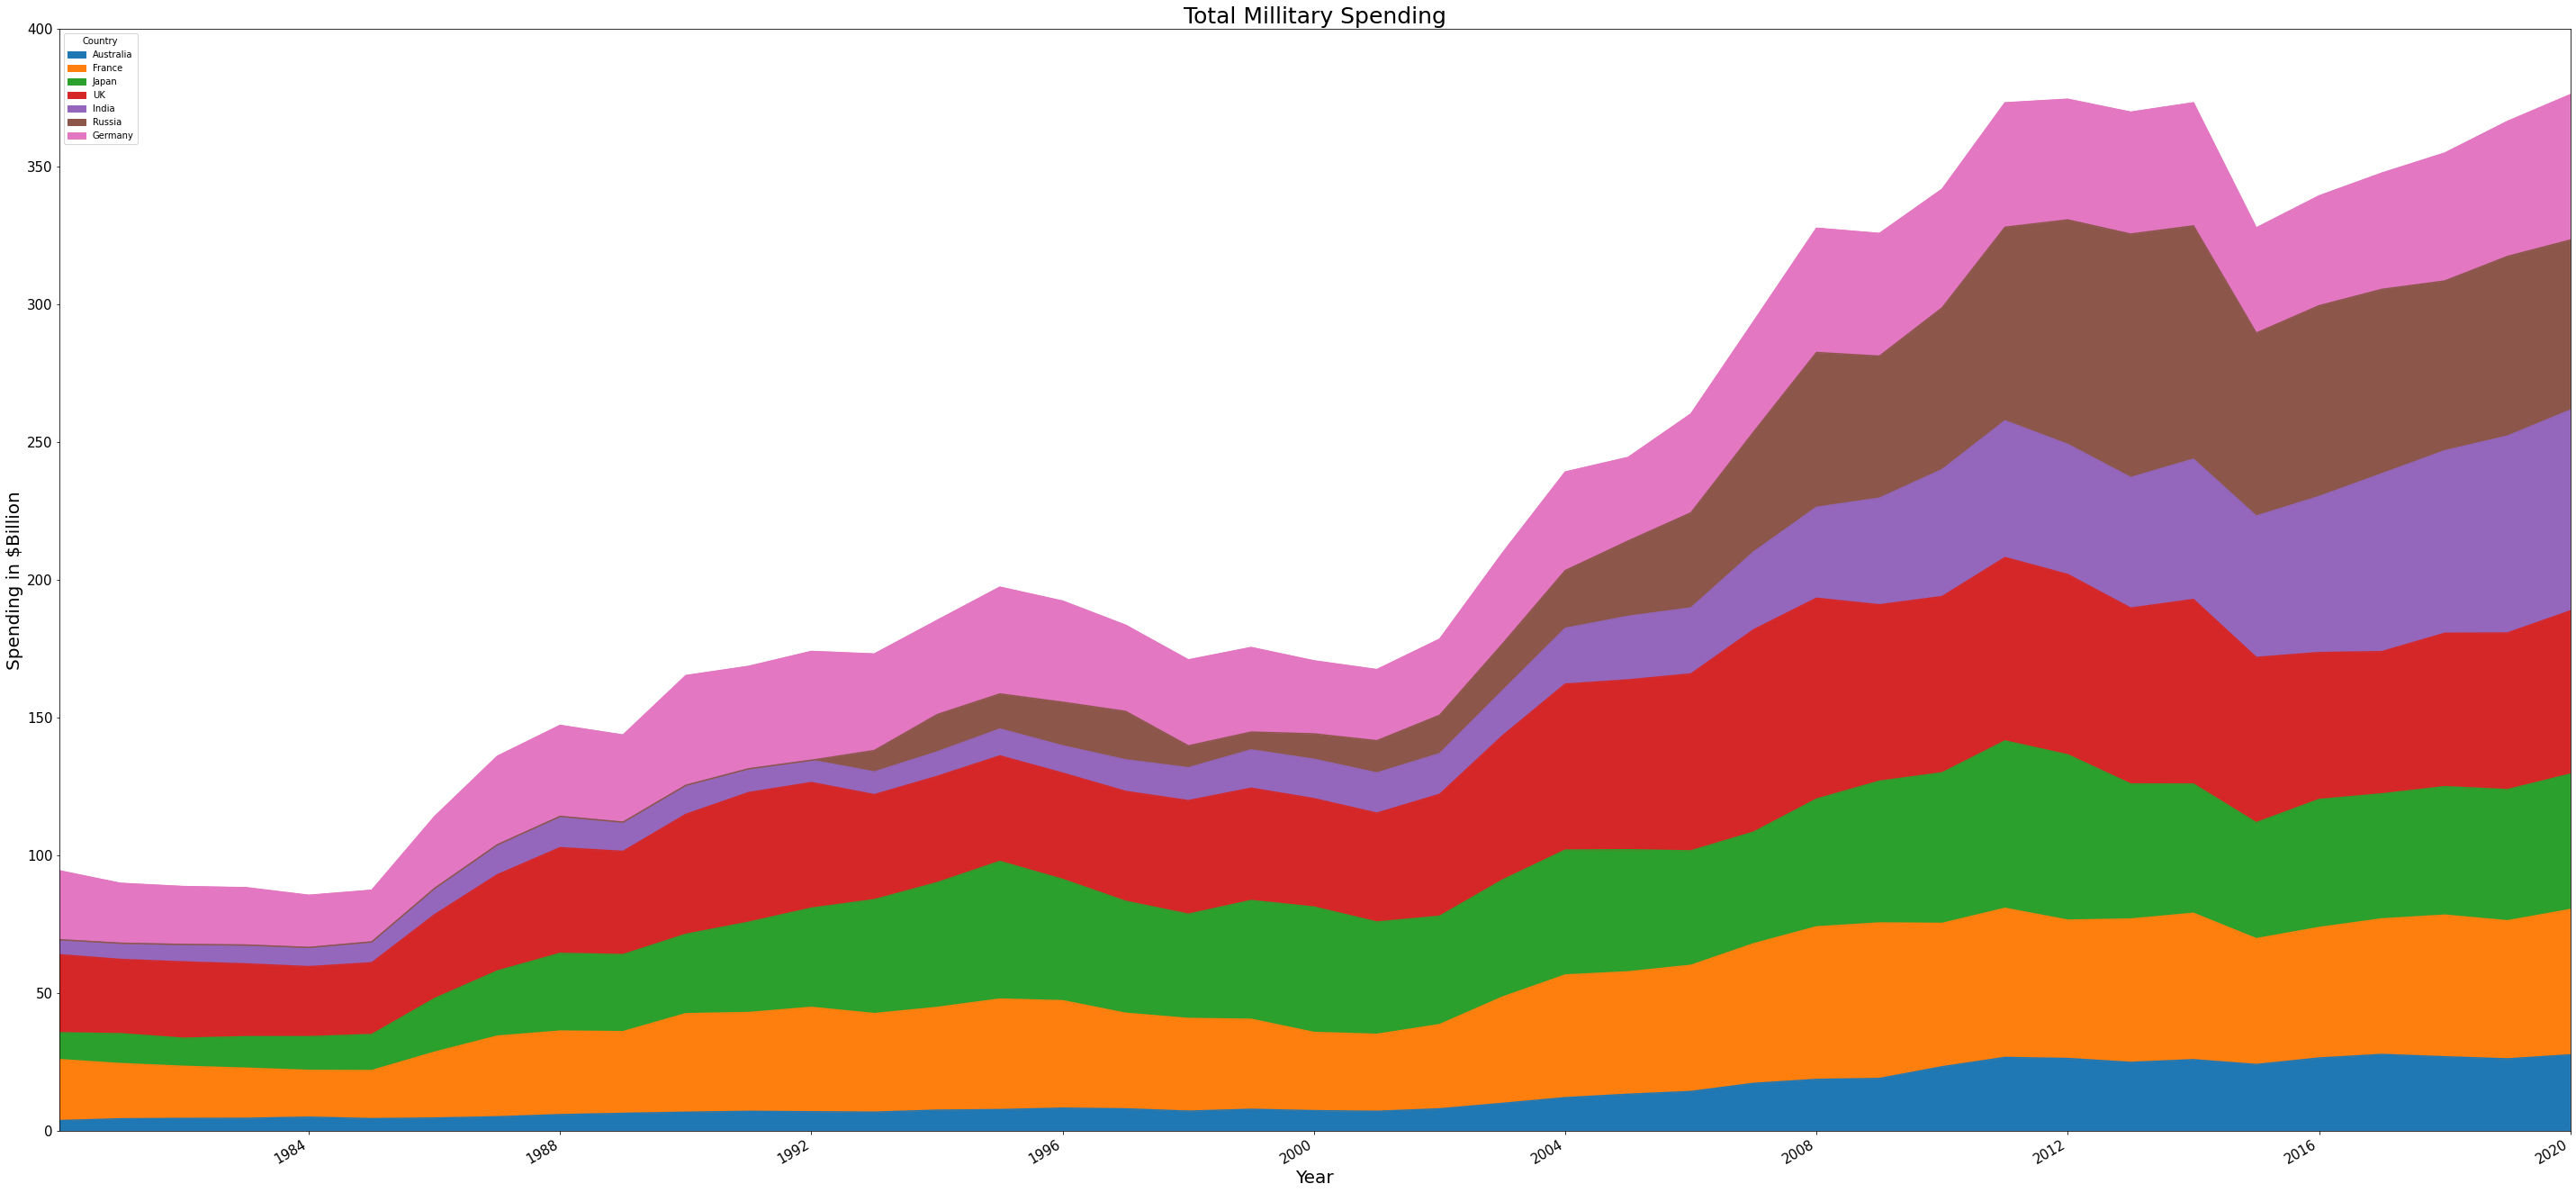

In [573]:
combinedStack()

In [574]:
def totalStacked():

    UCA_usd = currentUSD[['Australia', 'France', 'Japan', 'UK', 'India', 'Russia', 'China', 'USA']]
    USA = currentUSD[['USA']]

    #fig, ax = plt.subplots()
    ax = UCA_usd.plot(kind='area', stacked=True)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.xlim([pd.Timestamp("1980-01-10"), pd.Timestamp("2020-01-01")])
    plt.ylim(0, 1450000)
    plt.ylabel('Spending in $Billion', size=20)
    plt.xlabel('Year', size=20)
    plt.title('Total Millitary Spending', size=25)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

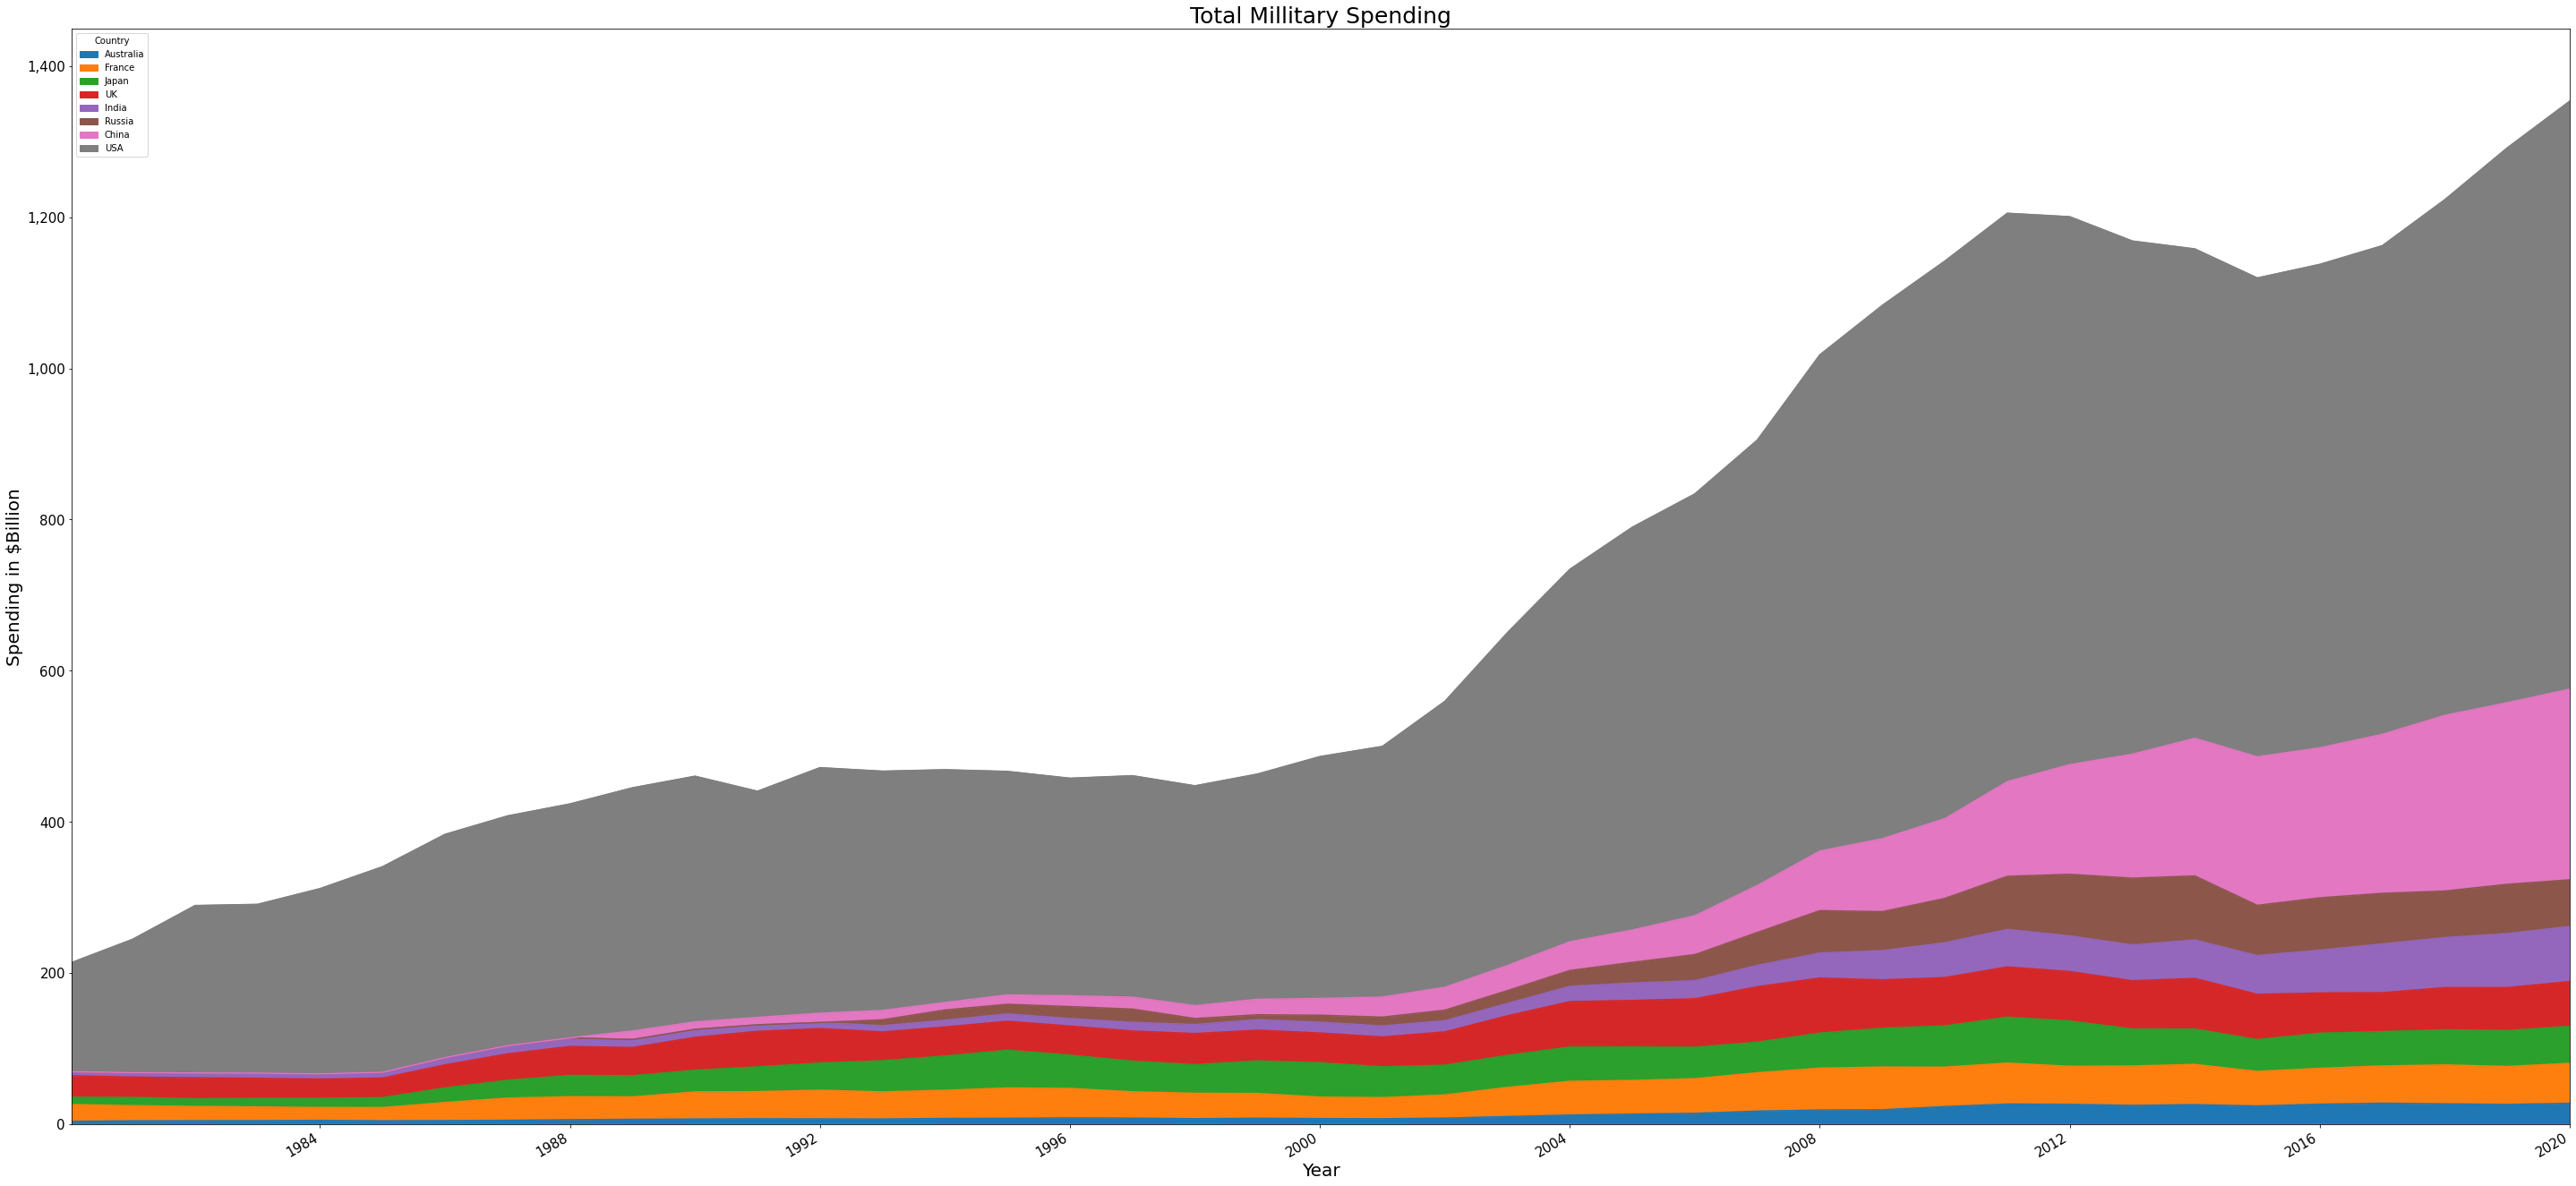

In [575]:
totalStacked()

In [576]:
def totalAnno():
    nineMon = currentUSD['USA'][52]
    recesMon = currentUSD['USA'][42]
    iraqMon = currentUSD['USA'][62]
    trumMon = currentUSD['USA'][67]
    curMon = currentUSD['USA'][71]
    UCA_usd = currentUSD[['USA', 'China', 'Australia']]
    USA = currentUSD[['USA']]

    #fig, ax = plt.subplots()
    ax = UCA_usd.plot(kind='area', stacked=False, color=('#3AAAF7', '#BC4FFA', '#031B2A'))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
#f"{column}: ${max_val:.2f}
    ax.annotate(f'${recesMon:.2f}\n1990 recession',size=15,
                xy = (currentUSD.index[42], currentUSD['USA'][42]),
                #xycoords='data',
                xytext=(20,50),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                ha='center') 
    ax.annotate(f'${nineMon:.2f}\n9/11 Terrorist Attacks',size=15,
                xy = (currentUSD.index[52], currentUSD['USA'][52]),
                #xycoords='data',
                xytext=(0,70),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                ha='center') 
    ax.annotate(f'${iraqMon:.2f}\nDeclared the end of \nthe Iraq war',size=15,
                xy = (currentUSD.index[62], currentUSD['USA'][62]),
                #xycoords='data',
                xytext=(150,0),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                ha='center') 
    ax.annotate(f'${trumMon:.2f}\nTrump elected',size=15,
                xy = (currentUSD.index[67], currentUSD['USA'][67]),
                #xycoords='data',
                xytext=(0,60),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                ha='center') 
    ax.annotate(f'${curMon:.2f}\nSpending as of 2020', size=15,
                xy = (currentUSD.index[71], currentUSD['USA'][71]),
                #xycoords='data',
                xytext=(140,0),
                textcoords='offset points',
                arrowprops=dict(arrowstyle="->"),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                ha='center') 


    plt.xlim([pd.Timestamp("1990-01-10"), pd.Timestamp("2020-01-01")])
    plt.ylabel('Spending in $Billion', size=20)
    plt.xlabel('Year', size=20)
    plt.title('Total Millitary Spending \n USA, China and Australia', size=25)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    

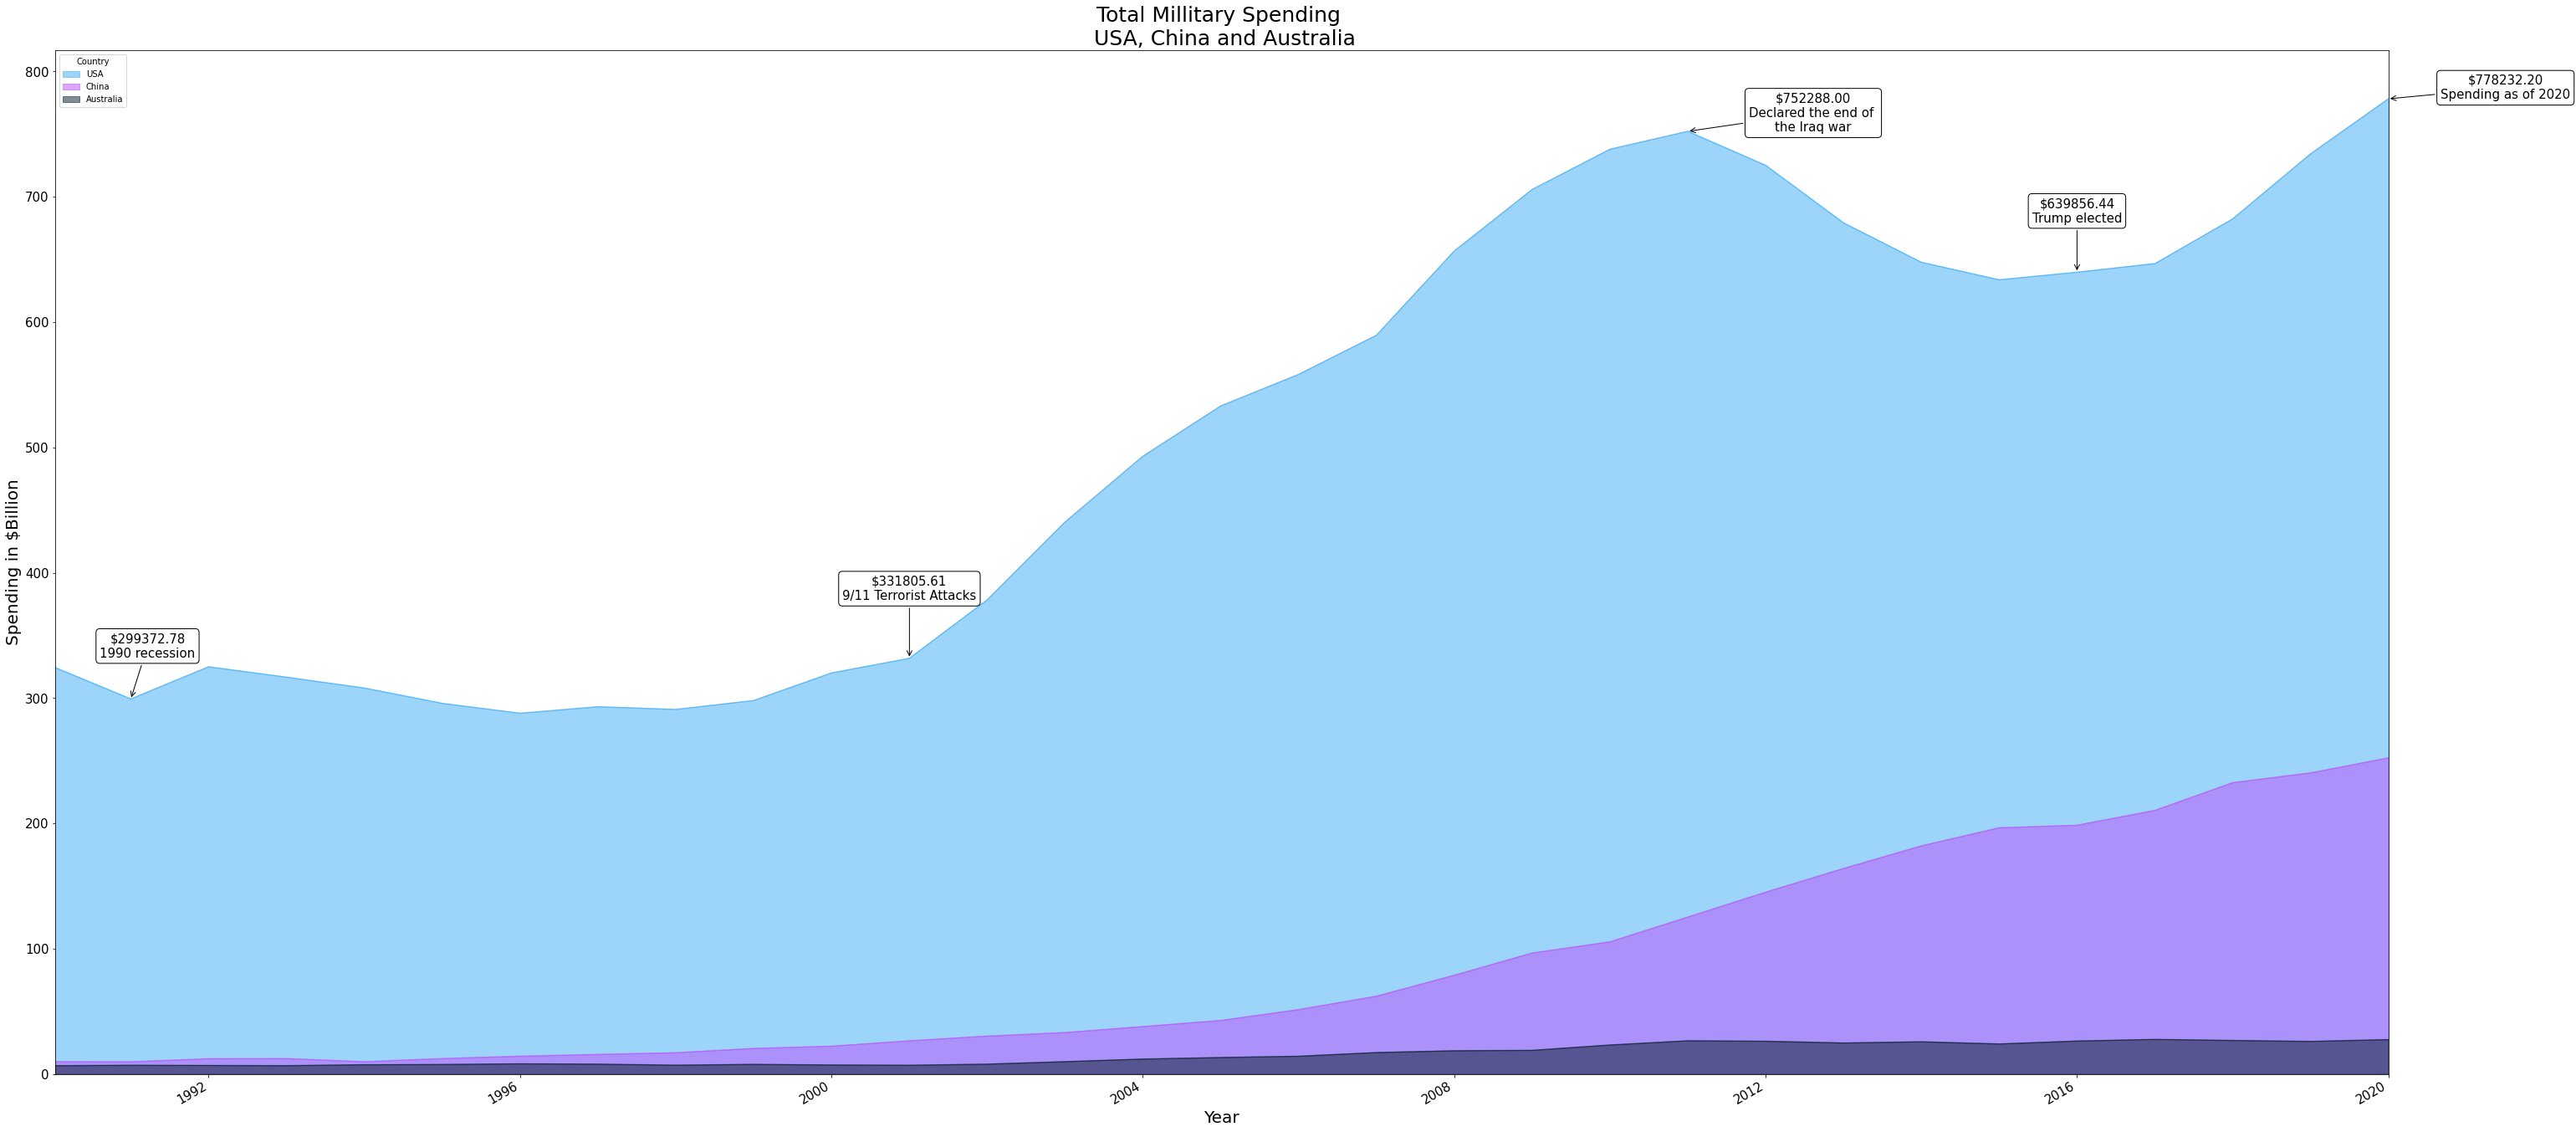

In [577]:
totalAnno()

In [578]:
def depression():

    ax = USA.plot(kind='area', stacked=False, color=('#3AAAF7'))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.xlim([pd.Timestamp("1990-01-10"), pd.Timestamp("1992-01-01")])
    plt.ylim(295000, 330000)
    plt.ylabel('Spending in $Billion\n', size=20)
    plt.xlabel('Year', size=20)
    plt.title('USA 1990 Depression Drop in Spending\n', size=25)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.grid()

    

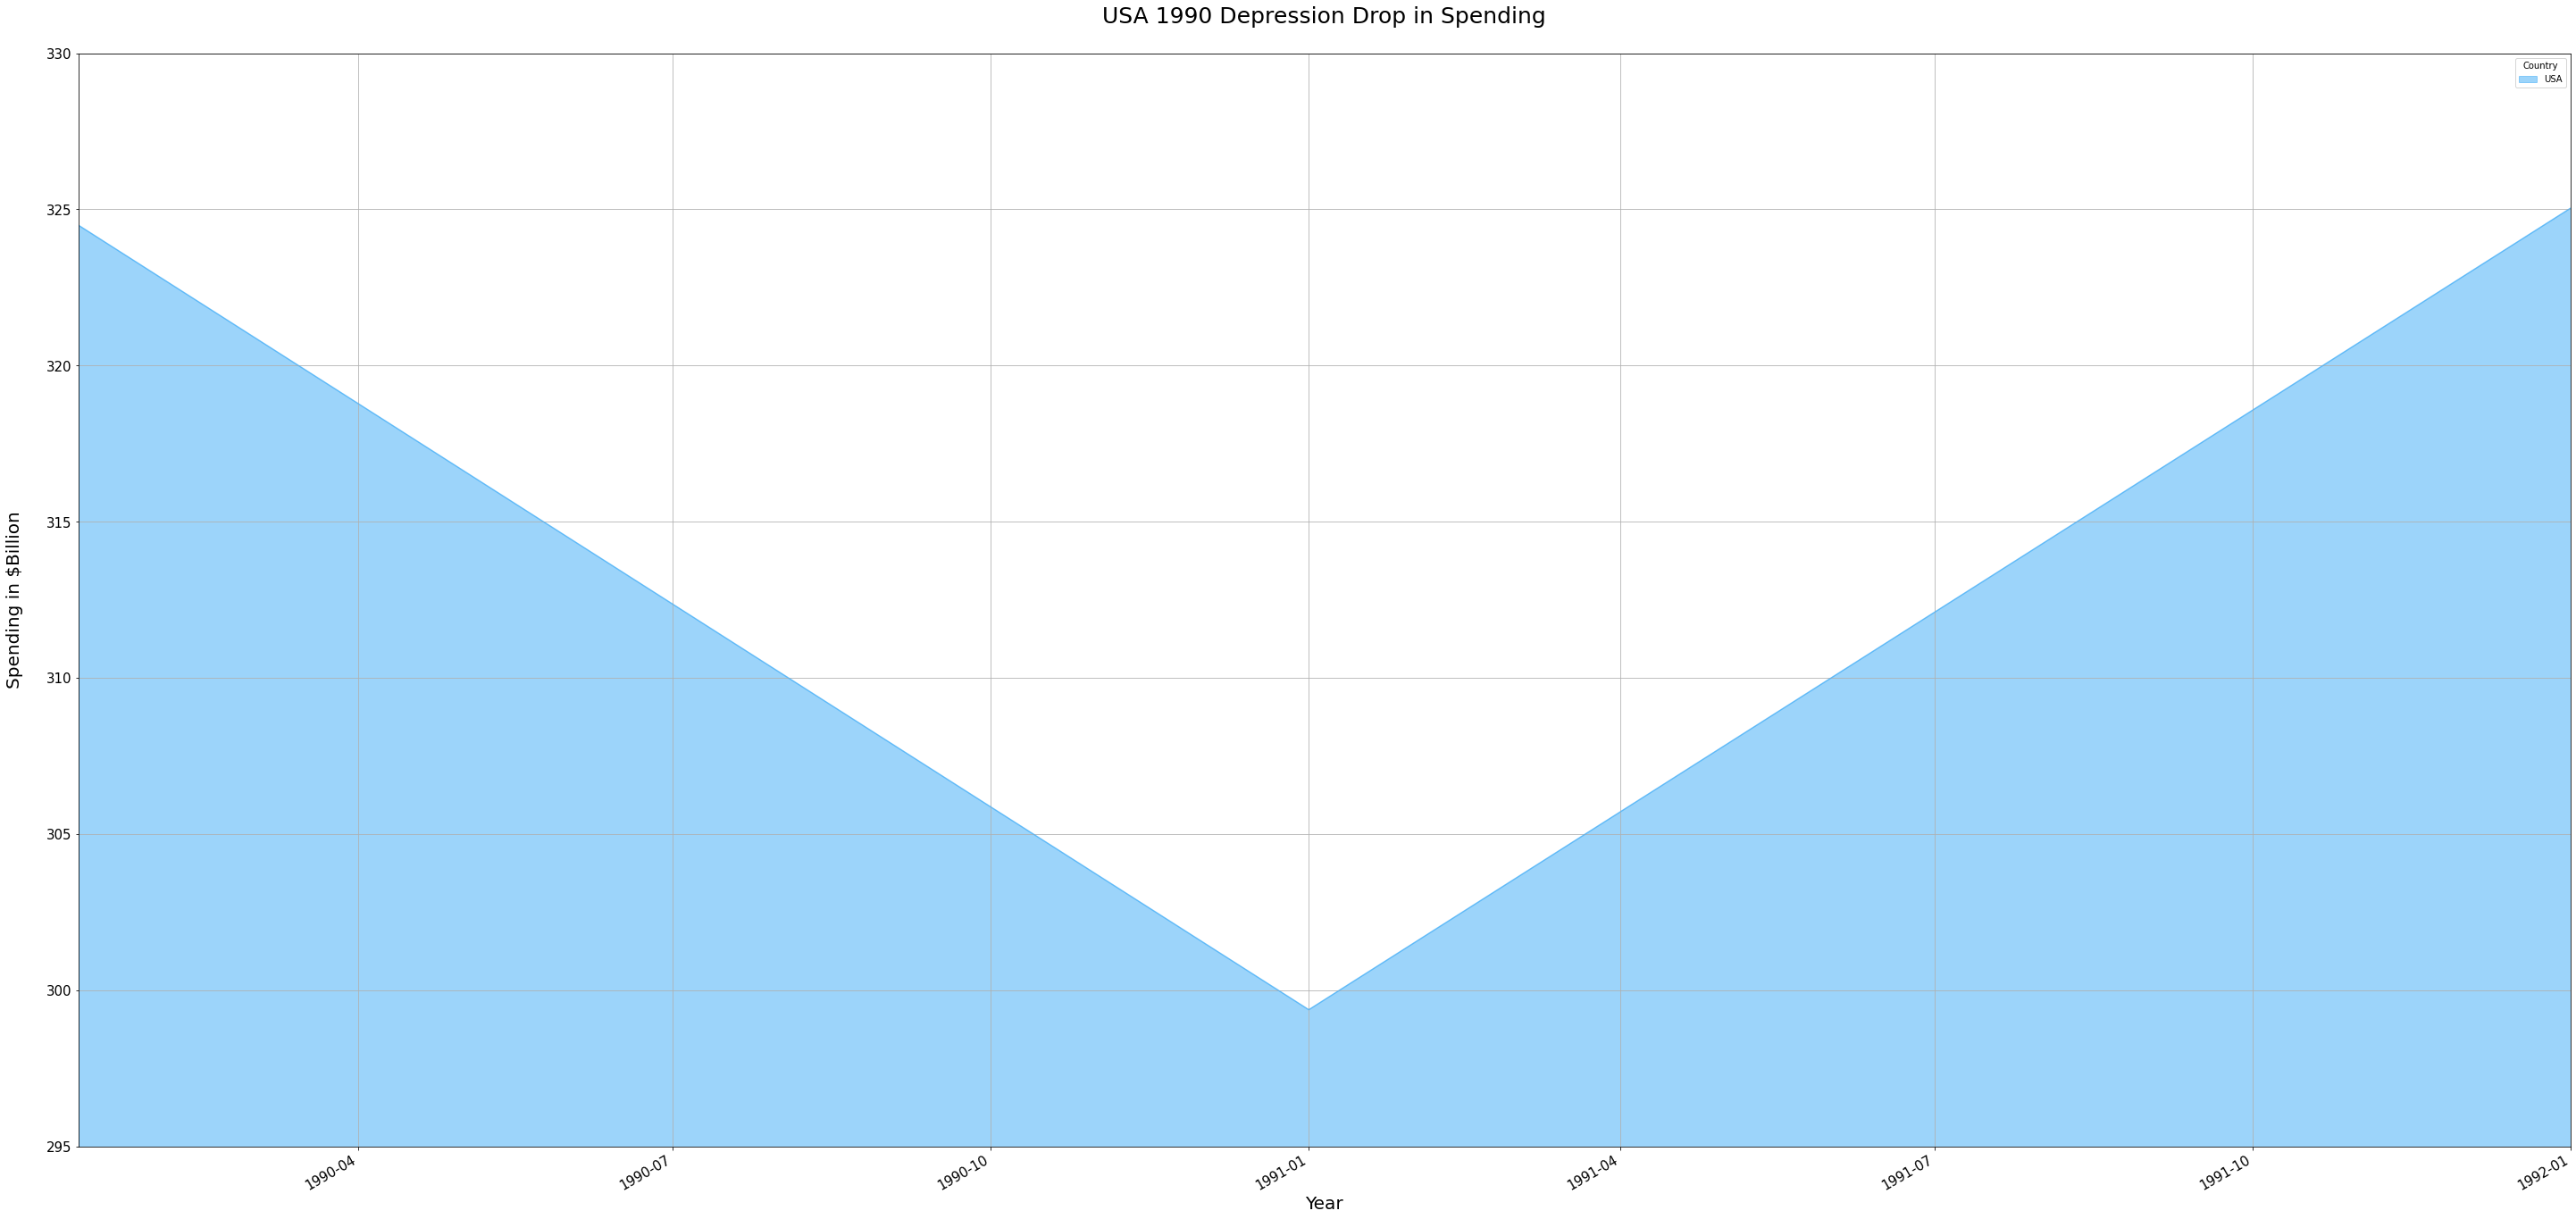

In [579]:
depression()

In [580]:
def zoomTotal():
    UCA = currentUSD[['USA', 'China', 'Australia']]
    ax = UCA.plot(kind='area', stacked=False, color=('#3AAAF7', '#BC4FFA', '#031B2A'))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    # children = ax.get_children()
    # children[1].set_alpha(0.6)
    # children[2].set_alpha(0.9)
    # children[3].set_alpha(0.9)
    plt.xlim([pd.Timestamp("1990-01-10"), pd.Timestamp("2020-01-01")])
    plt.ylim([0, 100000 ])
    plt.title("Total Millitary Spending \nUSA, China and Australia", fontsize=25)
    plt.xlabel("Year", fontsize = 20)
    plt.ylabel("Spending in $Billion", fontsize=20)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    plt.grid()

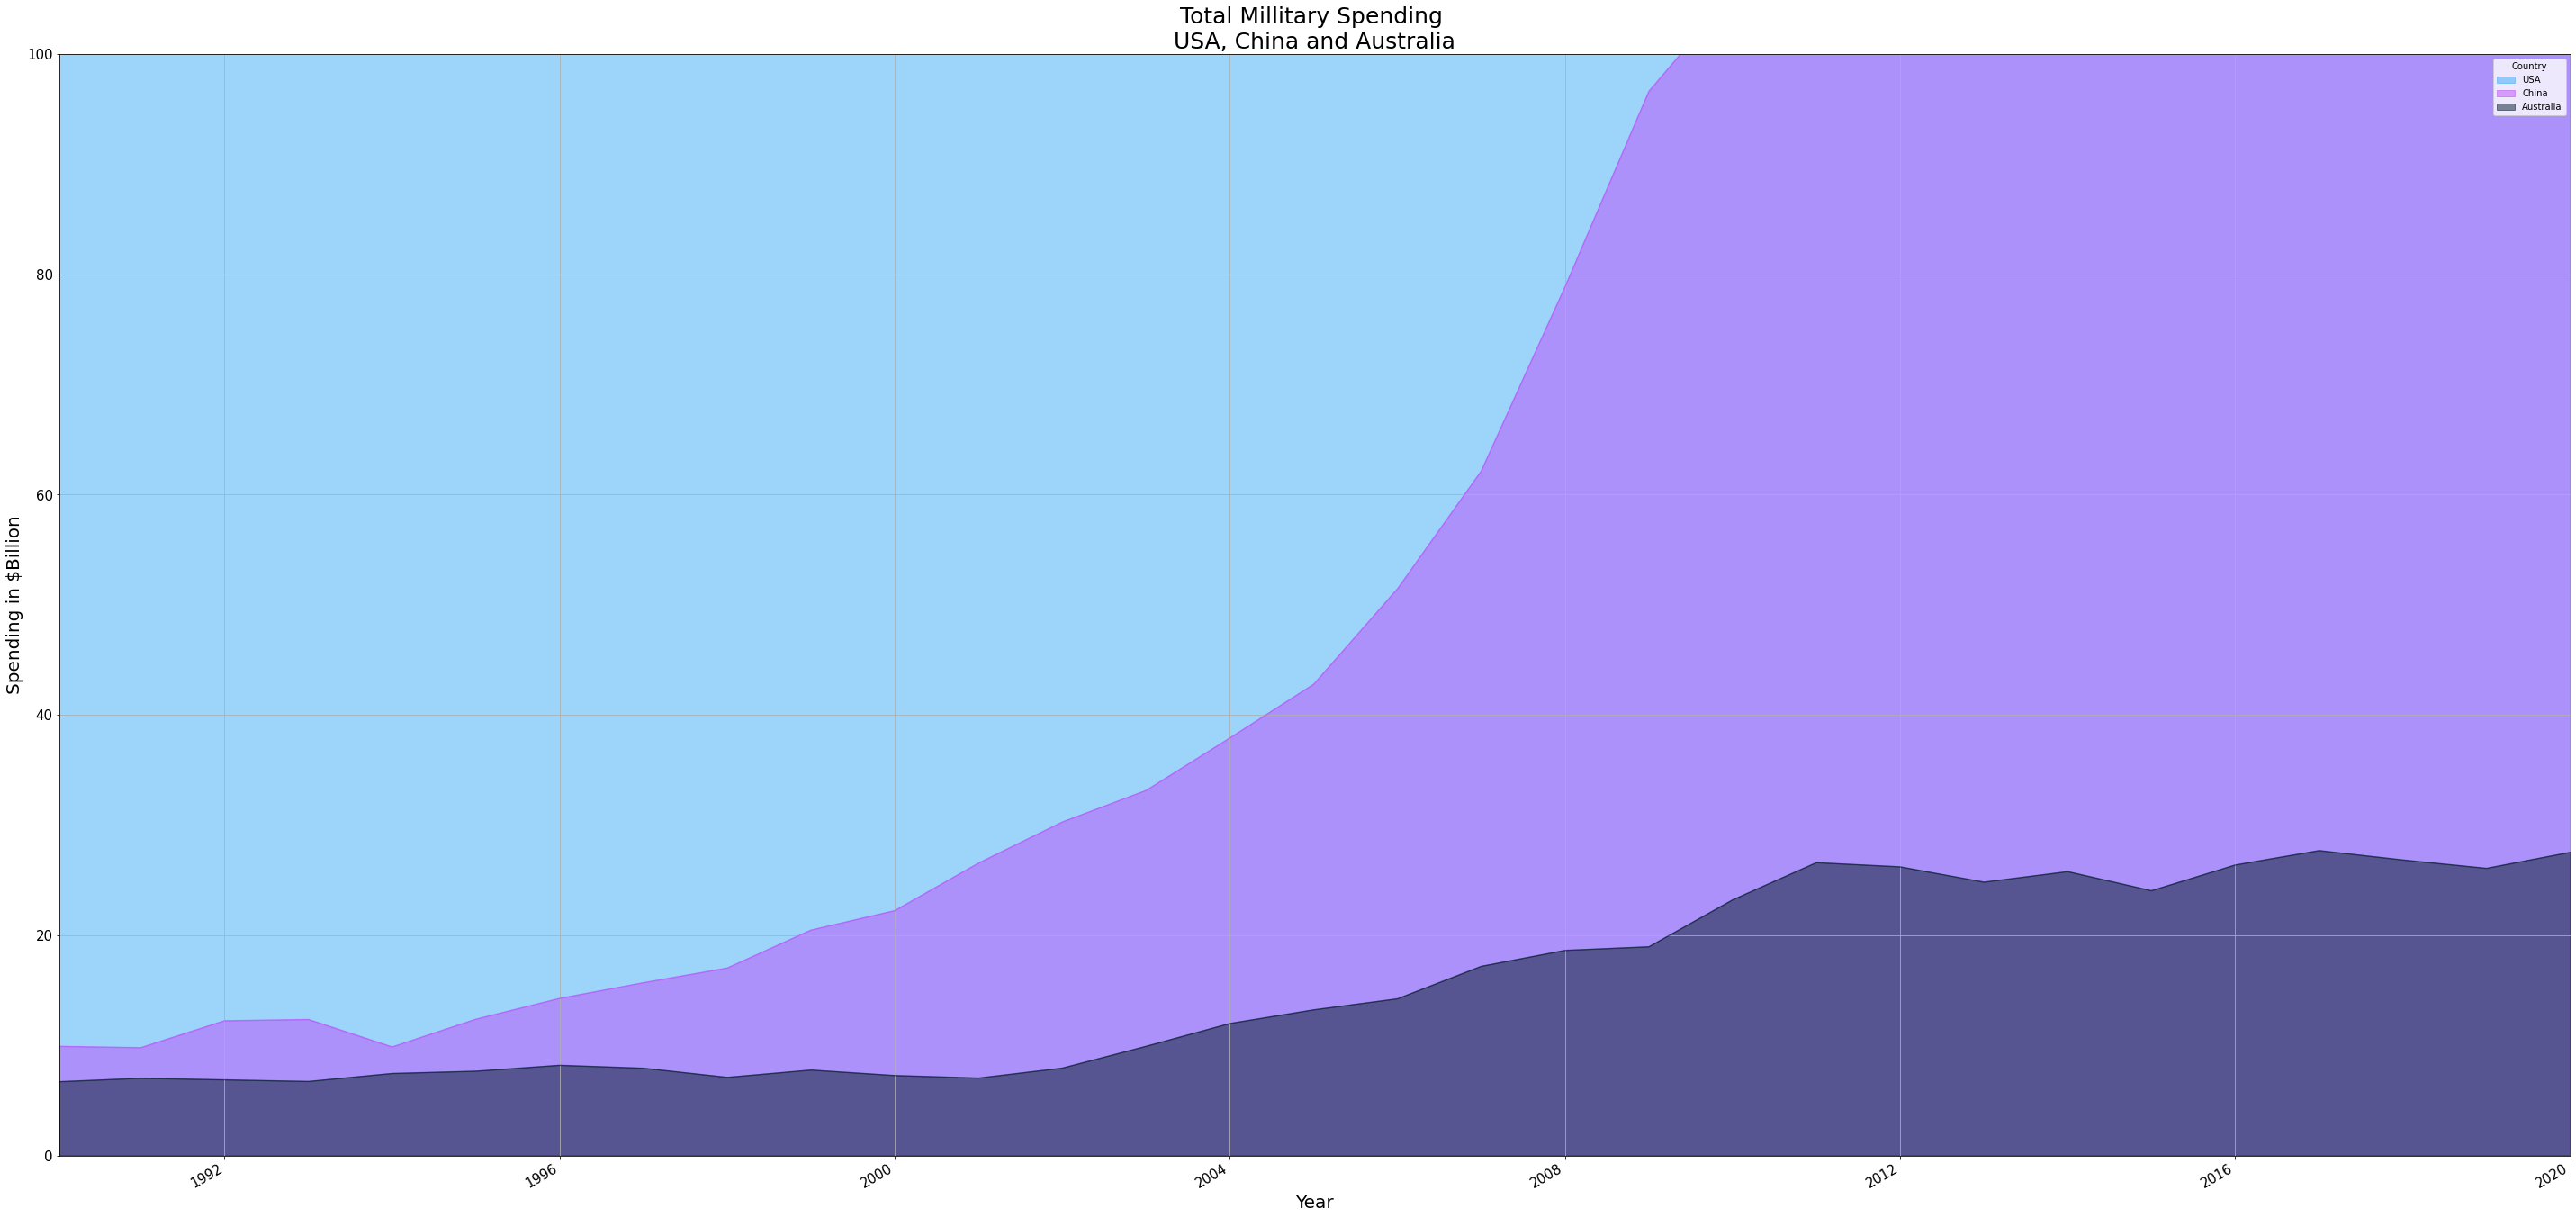

In [581]:
zoomTotal()


In [582]:
def fd3():
    fd3 = perCapita[['USA', 'Australia', 'UK', 'France','Germany', 'India', 'China']]
    fd3.plot(kind='area')
    plt.xlim(['2000-01-10', '2020-01-01'])
    plt.ylabel("Spending in USD", size=20)
    plt.xlabel("Year", size=15)
    plt.title('Per Capita Millitary Spending: USA, Australia, UK, France, India', size=20)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

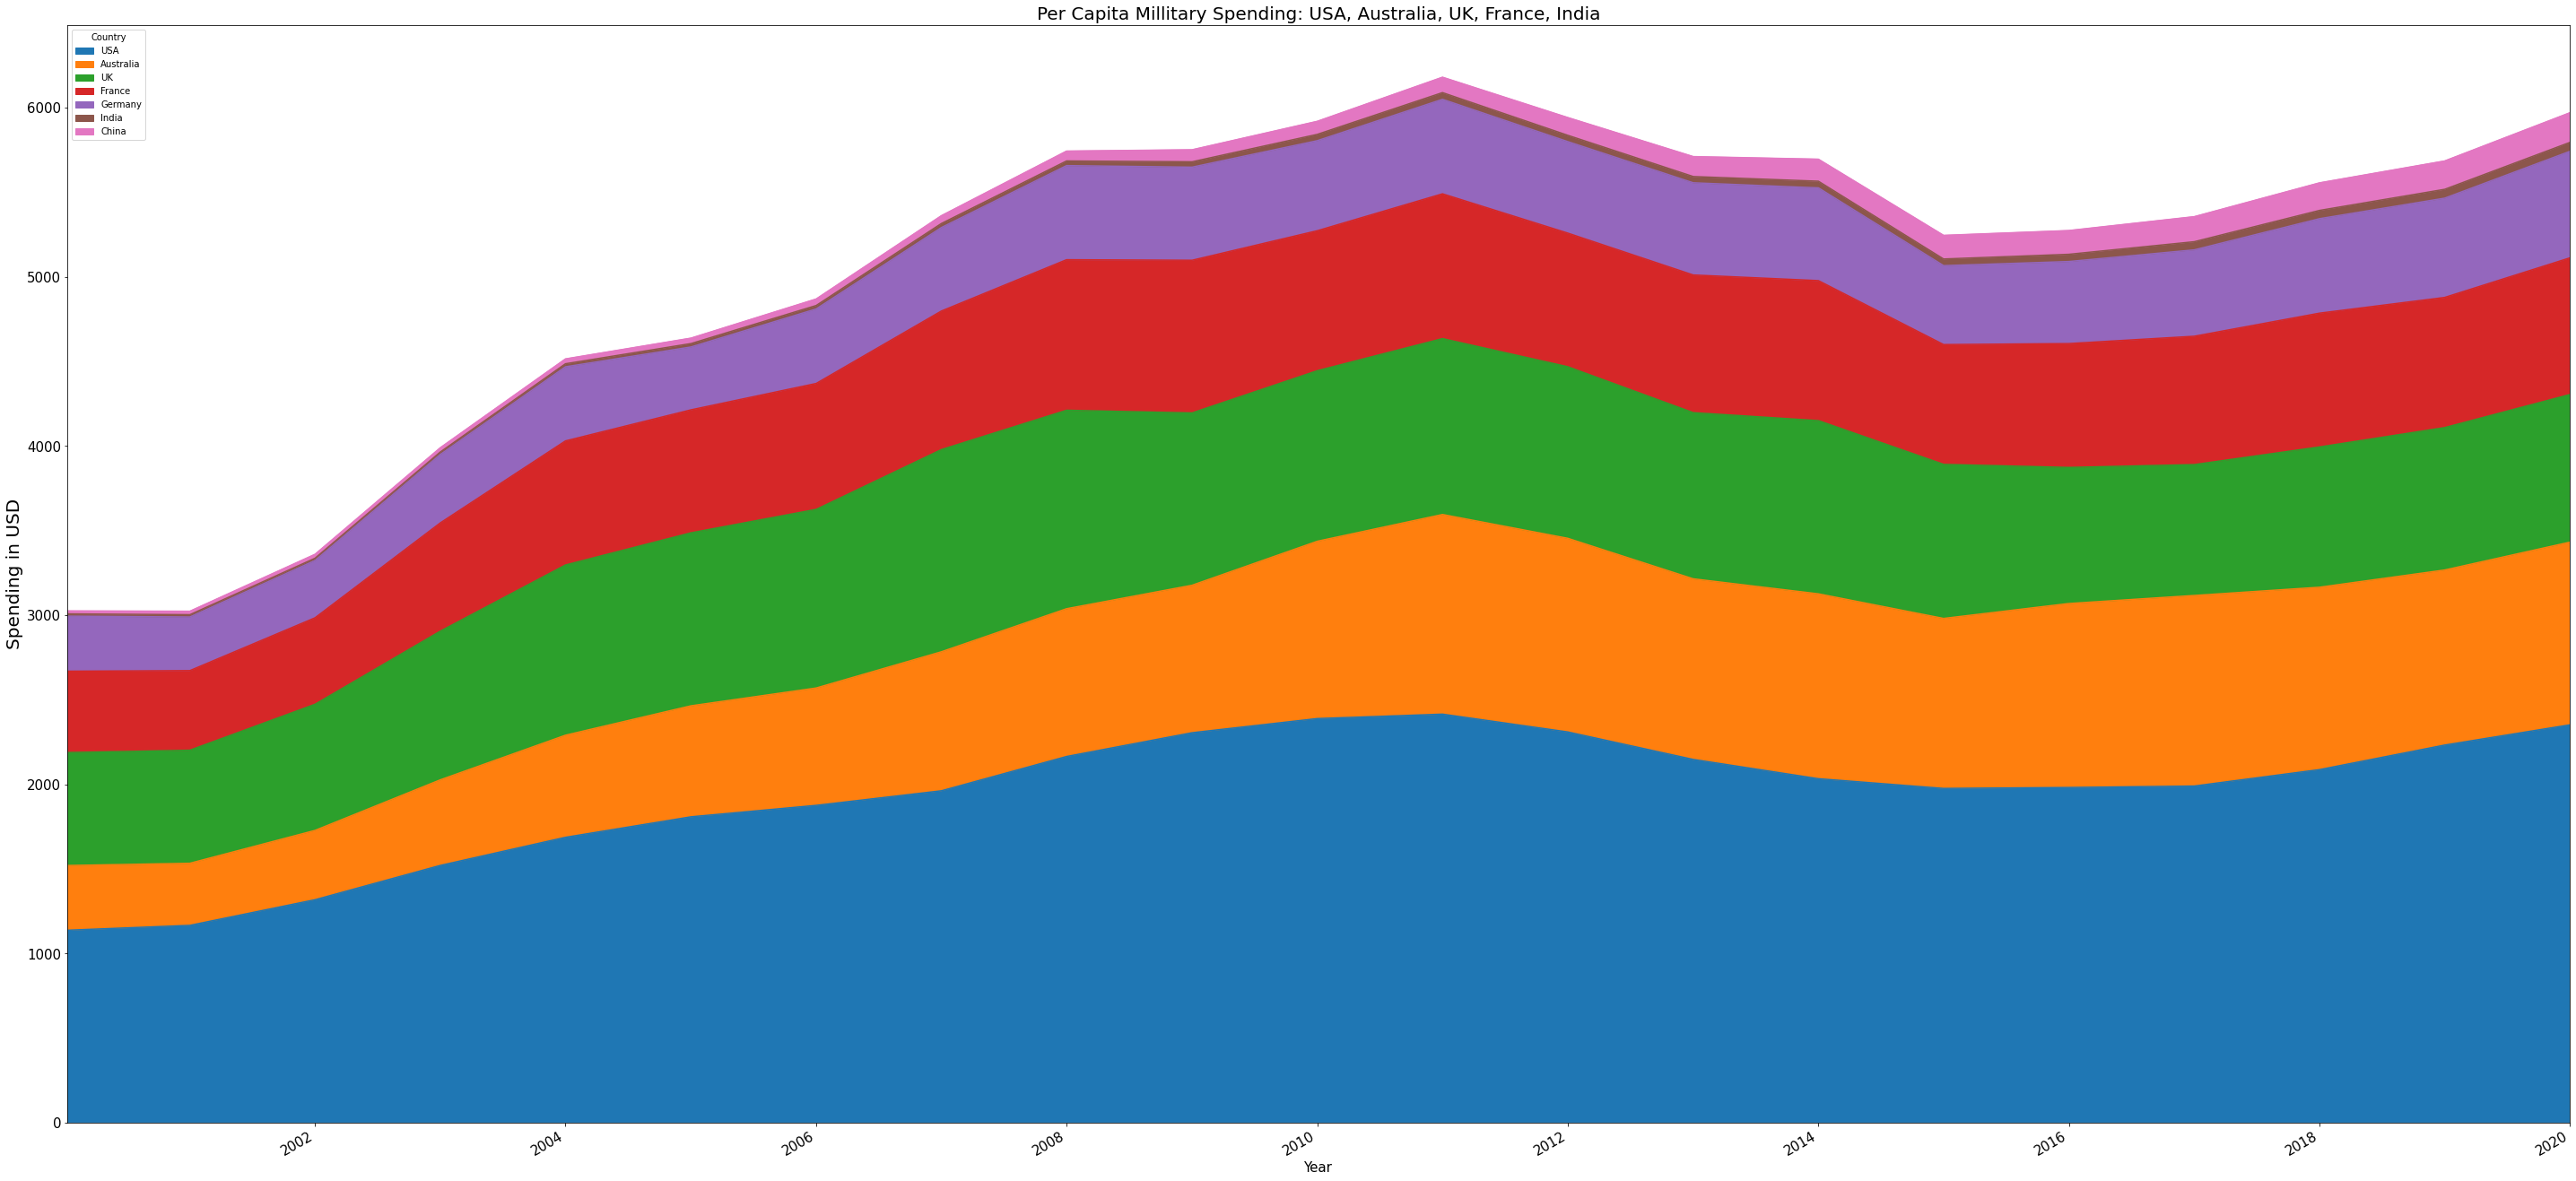

In [583]:
fd3()

In [584]:
def perCap():
    UCA_perCap = perCapita[['USA', 'Australia', 'China']] 
    ax = UCA_perCap.plot(kind='area', stacked=False, color=('#3AAAF7', '#0071BA', '#031B2A'))

    children = ax.get_children()
    children[1].set_alpha(0.7)
    children[2].set_alpha(0.8)
    children[3].set_alpha(0.6)



    for column in UCA_perCap:
        try:
            max_val = UCA_perCap[column].max()
            min_val = UCA_perCap[column].min()
            i=UCA_perCap[column].idxmax()
            if column == "USA":
                ax.annotate(f"{column}: ${max_val:.2f}, \nDeclared the end of the Iraq War", size=15, 
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                xy=(i, max_val), xytext=(10, 90), textcoords='offset points', ha='center',
                arrowprops=dict(arrowstyle="->"))
            elif column == "Australia":
                ax.annotate(f"{column}: ${max_val:.2f}, \nDeployed 1550 troops to Afghanistan", size=15, 
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                xy=(i, max_val), xytext=(10,90), textcoords='offset points', ha='center',
                arrowprops=dict(arrowstyle="->"))
            else :
                ax.annotate(f"{column}: ${max_val:.2f}", xy=(i, max_val))

        except Exception as e:
            print(columns, e)
    plt.xlim(["2000-01-10", "2020-01-01"])
    plt.ylim([0, 3000])
    plt.title("Military Spending per Capita", fontsize=25)
    plt.xlabel("Year", fontsize = 20)
    plt.ylabel("Spending in USD", fontsize=20)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    #plt.grid(True)


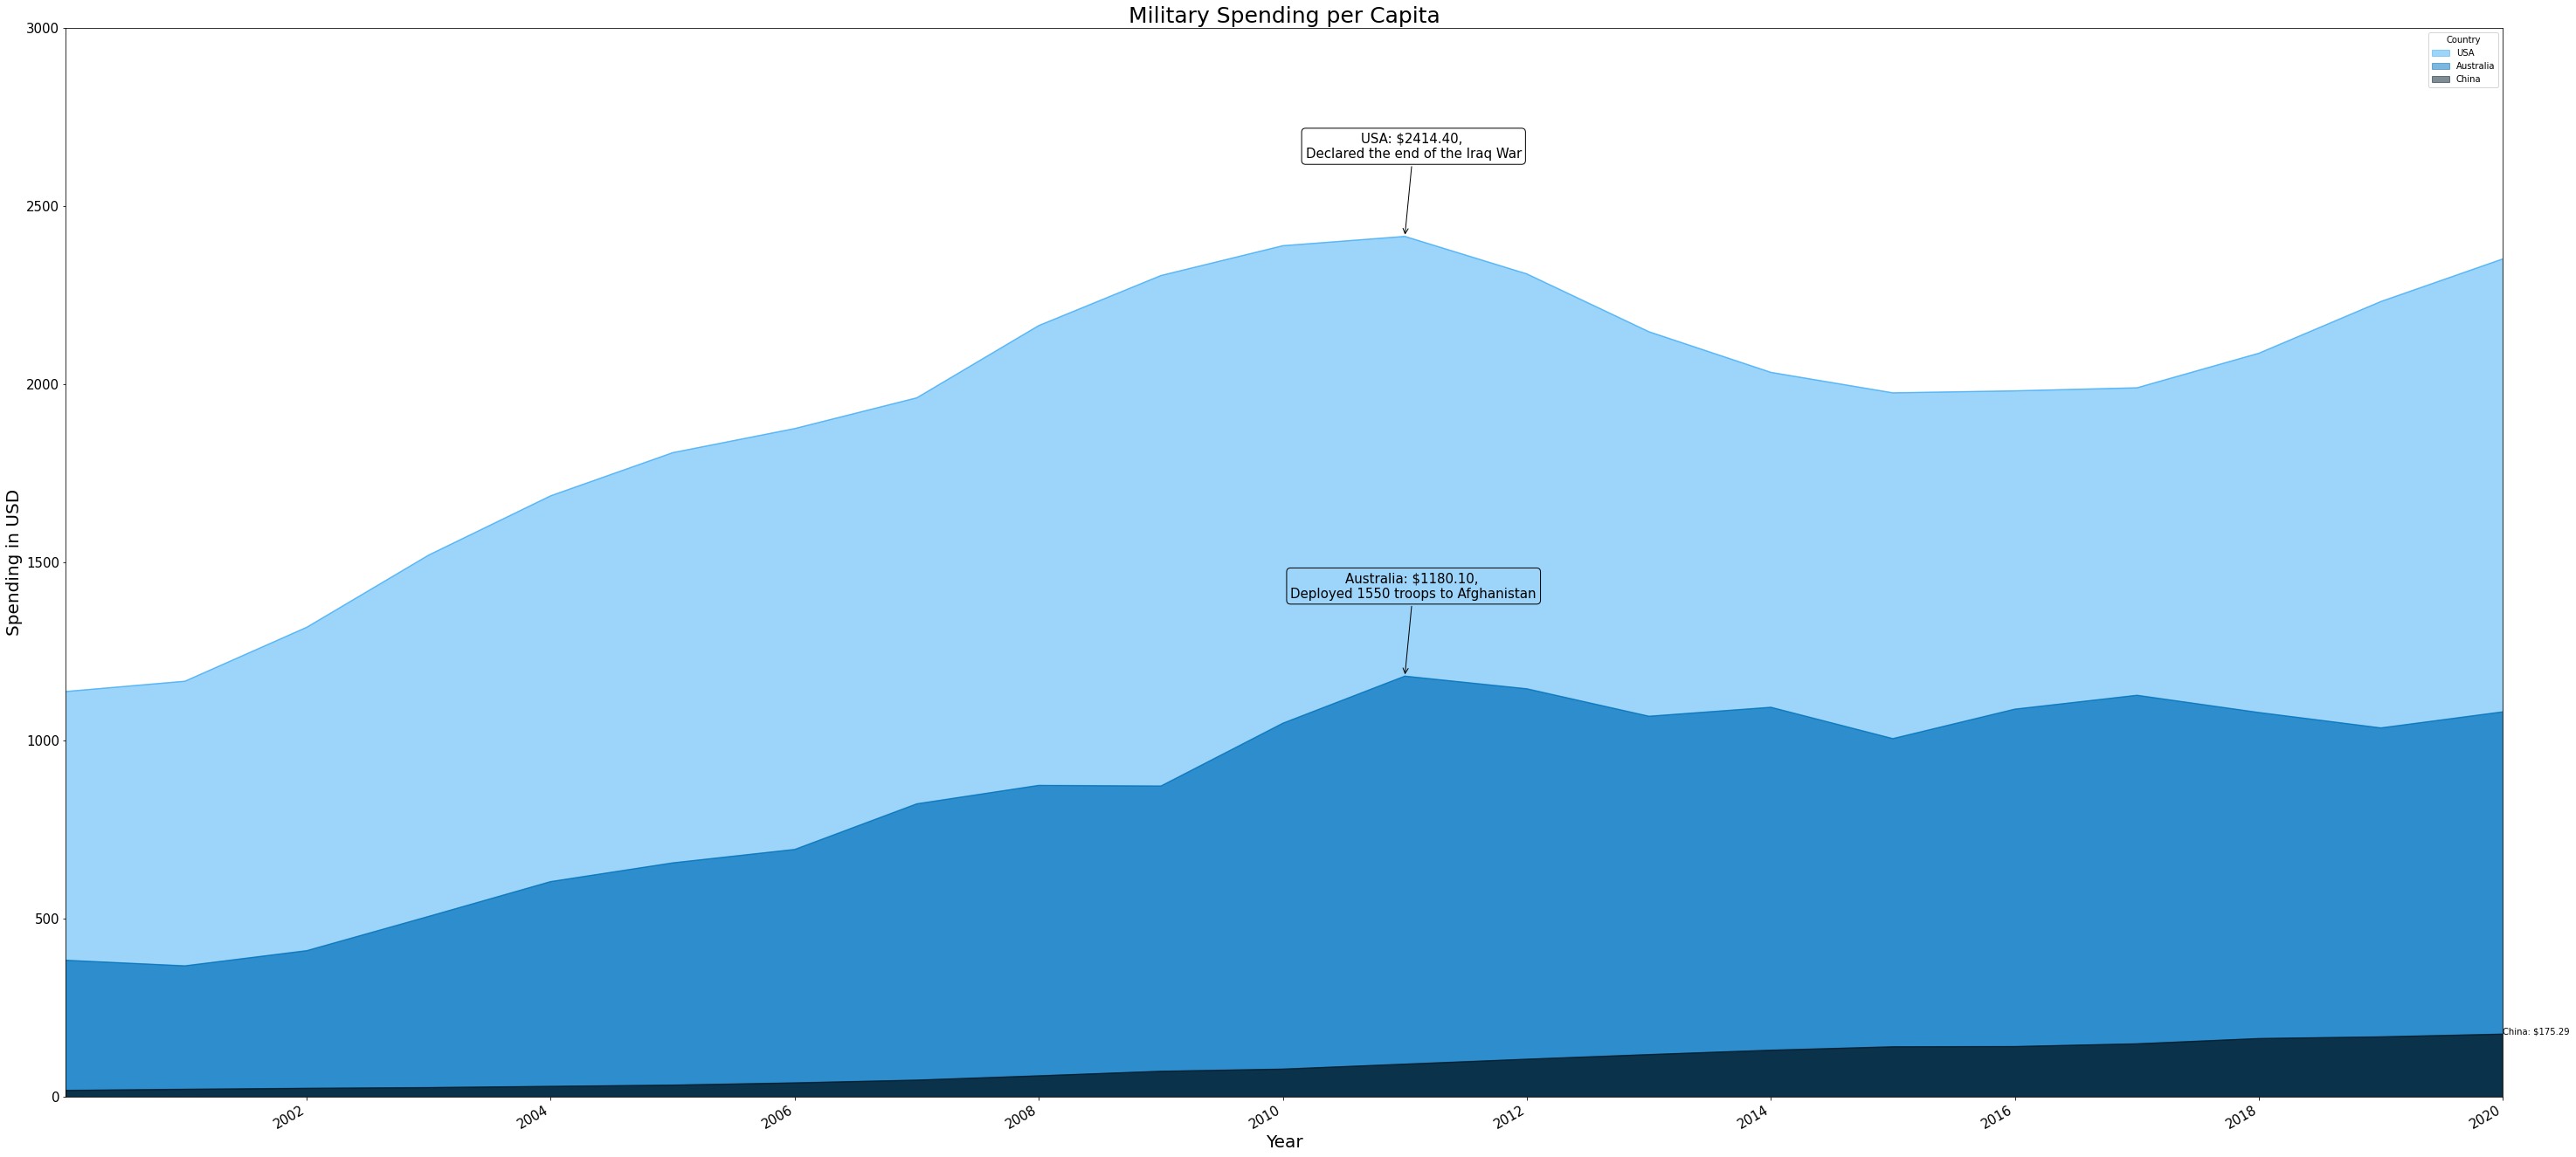

In [585]:
perCap()

In [586]:
JohnKennedyPL = JohnKennedy[['Approving']]
JohnsonPl = Johnson[['Approving']]
NixonPl = Nixon[['Approving']]
FordPl = Ford[['Approving']]
CarterPL = Carter[['Approving']]
ReaganPL = Reagan[['Approving']]
gBushPL = gBush[['Approving']]
ClintonPL = Clinton[['Approving']]
bushWPL = bushWApproval[['Approving']]
ObamaPL = obamaApproval[['Approving']]
trumpPL = trumpApproval[['Approving']]

curUS = currentUSD[['USA']]

In [587]:
def apprTotal():

    fig,ax = plt.subplots(figsize = (70,20))
    ax.plot(JohnKennedyPL, color='blue')
    ax.plot(JohnsonPl, color='blue')
    ax.plot(NixonPl, color='red')
    ax.plot(FordPl, color='red')
    ax.plot(CarterPL, color='blue')
    ax.plot(ReaganPL, color='red')
    ax.plot(gBushPL, color='red')
    ax.plot(ClintonPL, color='blue')
    ax.plot(bushWPL, color='red')
    ax.plot(ObamaPL, color='blue')
    ax.plot(trumpPL, color='red')

    ax.set_title("United States Presidential Approval Ratings \nFrom Kennedy - Trump", size=25)
    ax.set_xlabel("Year",fontsize=20)
    ax.set_ylabel("Approval Rating",color="black",fontsize=20)

    # ax2 = ax.twinx()
    # ax2.plot(curUS, color='green')

    ################ LINES ###################
    plt.axvline(x=pd.Timestamp("11-08-1963"), color='black', ymin=0.3, ymax=0.2)
    plt.axvline(x=pd.Timestamp("01-01-1969"), color='black')
    plt.axvline(x=pd.Timestamp("01/12/1975"), color='black')
    plt.axvline(x=pd.Timestamp("11/12/1976"), color='black')
    plt.axvline(x=pd.Timestamp("01/1/1981"), color='black')
    plt.axvline(x=pd.Timestamp("27/12/1988"), color='black')
    plt.axvline(x=pd.Timestamp("24/12/1992"), color='black')
    plt.axvline(x=pd.Timestamp("30/12/2000"), color='black')
    plt.axvline(x=pd.Timestamp("01-23-2009"), color='black')
    plt.axvline(x=pd.Timestamp("12-30-2016"), color='black')

    ################## X DATES #################
    plt.xlim([pd.Timestamp('1965-07-01'), pd.Timestamp('2021-02-01')])
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    DEM = mpatches.Patch(color='blue', label='Democrat')
    REP = mpatches.Patch(color='red', label='Republican')
    plt.legend(handles=[DEM,REP], prop={'size': 20})


# Can a correlation be seen between military spending and presidential approval rating?

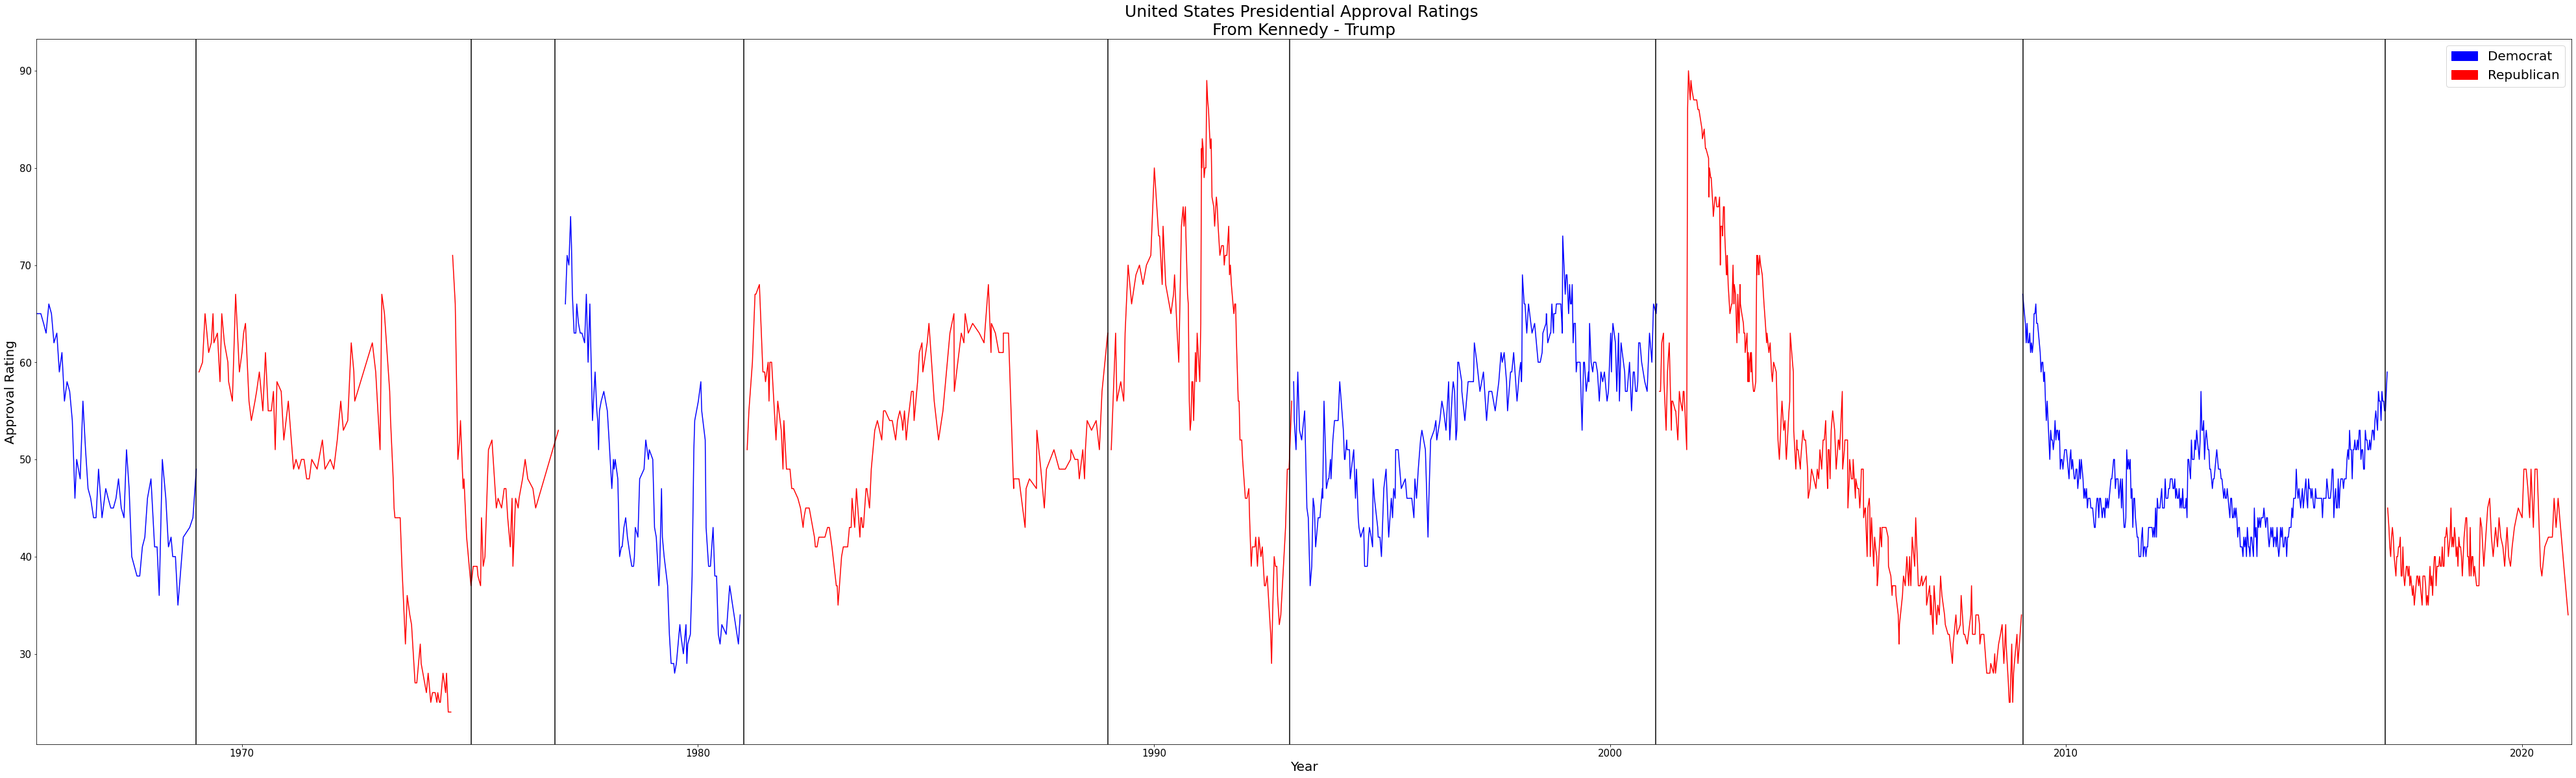

In [588]:
apprTotal()

In [589]:
def bushPLT():
    
    bushwPlot = bushWApproval[["Approving", "Disapproving"]]

    fig, ax = plt.subplots()
    ax.plot(bushwPlot)

    ax.annotate('9/11', size=15, 
                xy=(bushwPlot.index[262], bushwPlot['Approving'][262]),
                xycoords='data', 
                xytext=(-30, -50),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                textcoords='offset points', #what the xytext coordinates mean
                ha='center') #center the text horizontally
    ax.annotate('Begins Millitary action \nin Afghanistan', size=15, 
                xy=(bushwPlot.index[259], bushwPlot['Approving'][259]),
                xycoords='data', 
                xytext=(140, -5),
                bbox=dict(boxstyle="round", fc="none", ec="black"),
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                textcoords='offset points', #what the xytext coordinates mean
                ha='center') #center the text horizontally
    ax.annotate('Bush warns war against terrorism \nhas only just began', size=15, 
                xy=(bushwPlot.index[247], bushwPlot['Approving'][247]),
                xycoords='data', 
                xytext=(200, -5),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally

    ax.set_ylabel("\nApproval Rating", size=15)

    ax2 = ax.twinx()
    ax2.plot(curUS, color='red')
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    ax2.set_ylim(0, 600000)



    plt.title("George W. Bush Approval Rating versus Millitary Spending", size='15')
    plt.ylabel('\nSpending in $Billion', size=20)
    ax.set_ylabel('\nApproval Rating', size=20)
    plt.ylim(345000, 600000)
    plt.xlim([pd.Timestamp("01/30/2001"), pd.Timestamp("09/04/2006")])
    ax.set_xlabel("Years", size = 20)

    #ax.grid()
    #plt.show()
    #LEGEND
    APP = mpatches.Patch(color='blue', label='Approving')
    DISS = mpatches.Patch(color='orange', label='Disapproving')
    SPEND = mpatches.Patch(color='red', label='Millitary Spending')
    plt.legend(handles=[APP,DISS,SPEND], loc='upper right', prop={'size': 20})
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)



    plt.show()


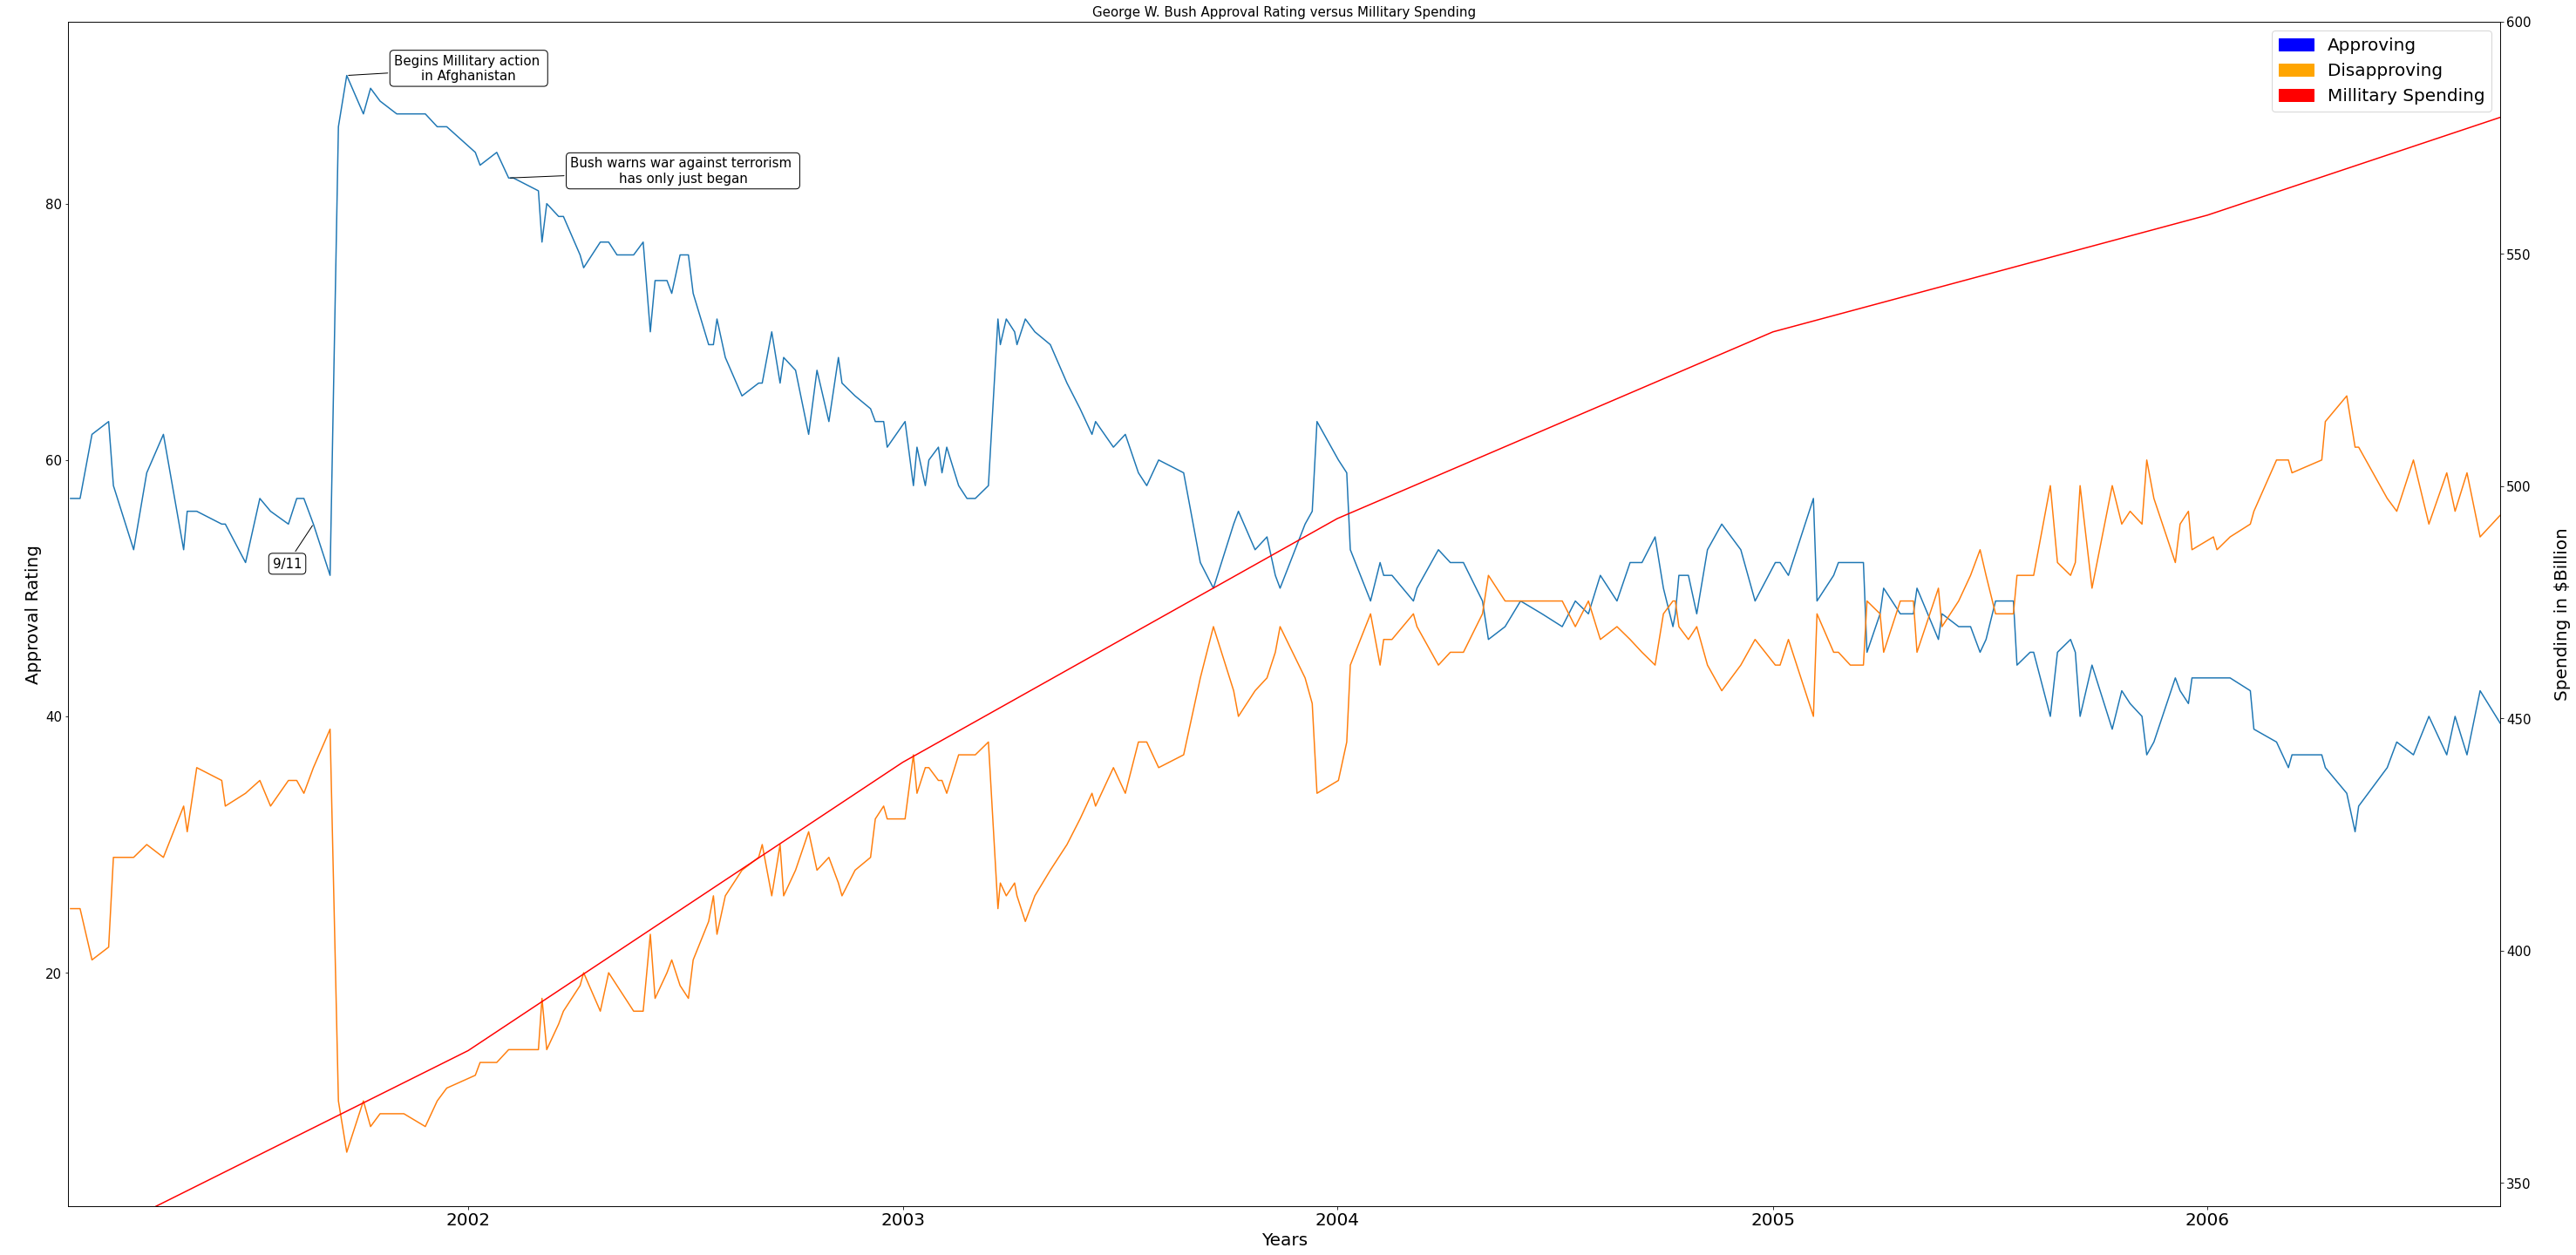

In [590]:
bushPLT()

In [591]:
def obamaPLT():
    obamaPlot = obamaApproval[["Approving", "Disapproving"]]
    trumpPlot = trumpApproval[["Approving"]]
    curUS = currentUSD[['USA']]

    fig, ax = plt.subplots(figsize = (50,25))
    ax.plot(obamaPlot)
    ax.annotate('Osama Bin Laden killed', size=15, 
                xy=(obamaPlot.index[300], obamaPlot['Approving'][300]),
                xycoords='data', 
                xytext=(0, 190),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally
    ax.annotate('Nuclear weapon reduction with Russia', size=15,
                xy=(obamaPlot.index[355], obamaPlot['Approving'][355]),
                xycoords='data', 
                xytext=(0, 110),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally

    ax.annotate('End of Iraq war', size=15, 
                xy=(obamaPlot.index[275], obamaPlot['Approving'][275]),
                xycoords='data', 
                xytext=(0, 150),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally
                
    ax.set_ylim(10, 75)  
    ax.set_ylabel("\nApproval Rating", color='black', size='15')
    ax.set_xlabel("Years", size=20)
    ax2 = ax.twinx()
    ax2.plot(curUS, color='red')
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.ylabel('\nSpending in $Billion', color='black', fontsize=15)
    plt.title("Barack Obama Approval Rating versus Millitary Spending", fontsize=15)
    plt.xlim([pd.Timestamp("01/24/2009"), pd.Timestamp("01/10/2013")])
    plt.ylim(670000, 760000)

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)


    #LEGEND
    APP = mpatches.Patch(color='blue', label='Approving')
    DISS = mpatches.Patch(color='orange', label='Disapproving')
    SPEND = mpatches.Patch(color='red', label='Millitary Spending')
    plt.legend(handles=[APP,DISS,SPEND], prop={'size': 20})

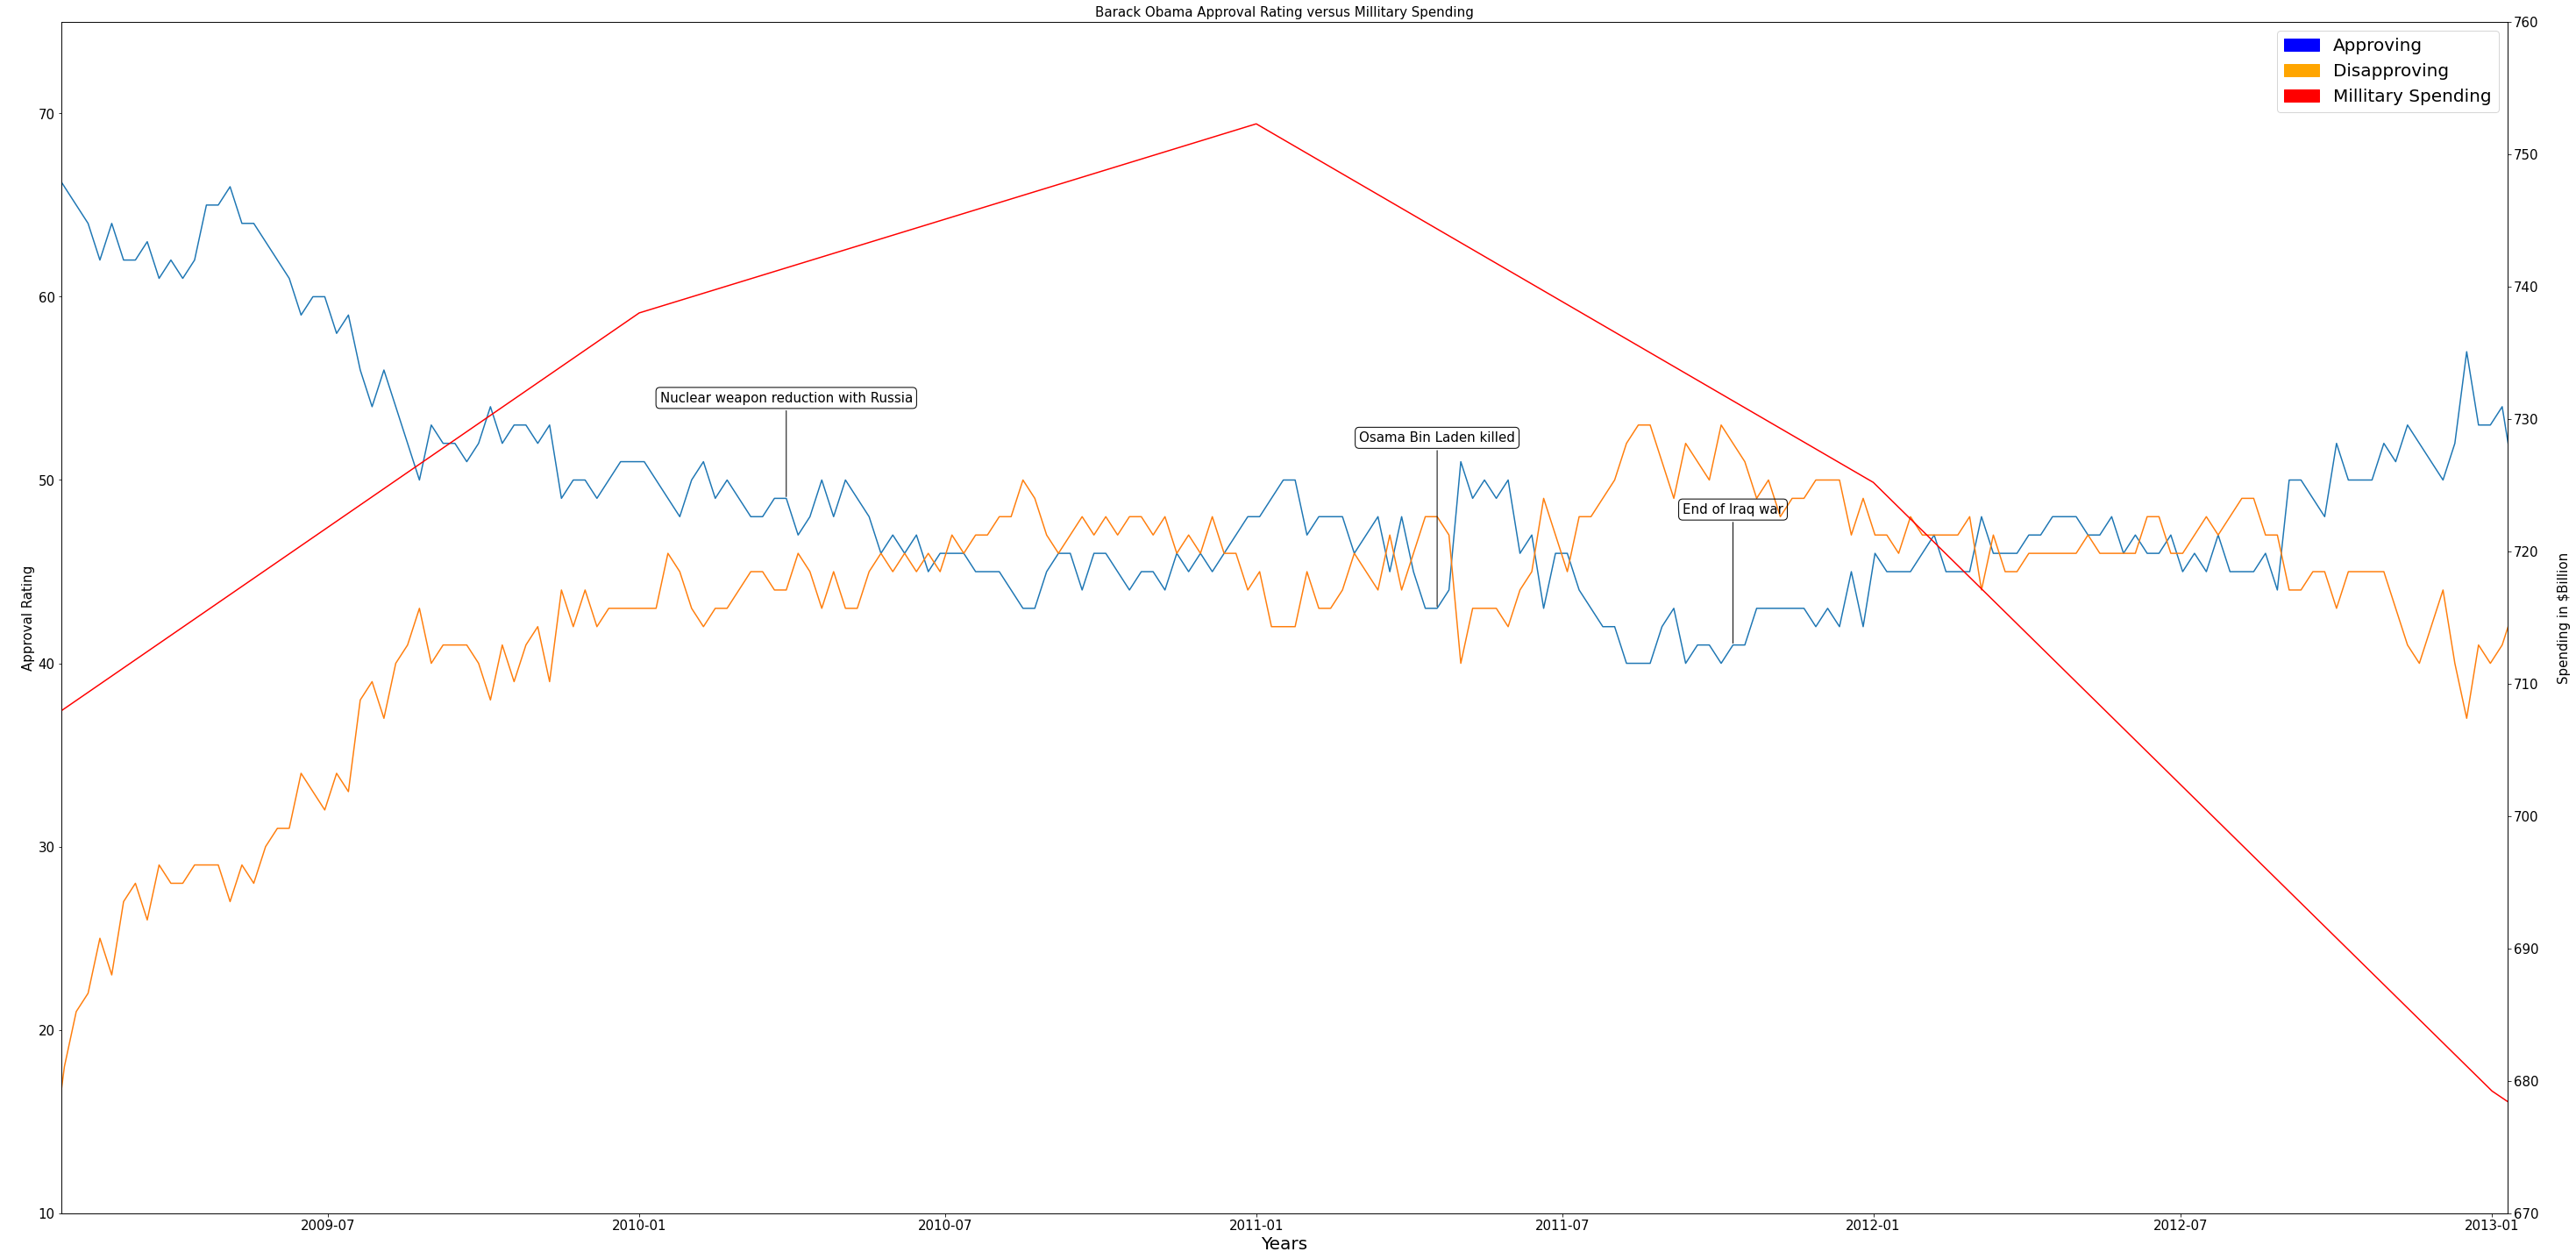

In [592]:
obamaPLT()

In [593]:
def trumpPLOT():
    
    trumpPlot = trumpApproval[["Approving", "Disapproving"]]
    fig, ax = plt.subplots(figsize = (50,25))
    ax.plot(trumpPlot)
    ax.set_ylim(25, 70)  
    ax.set_ylabel("\nApproval Rating", color='black', size='15')
    ax.set_xlabel("Years", size=15)
    ax.annotate('Increases presense in Afghanistan', size=15, 
                xy=(trumpPlot.index[116], obamaPlot['Approving'][116]),
                xycoords='data', 
                xytext=(0, 50),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally
    plt.axvline(x=pd.Timestamp("07/10/2017"), color='black', ymin=0, ymax=0.41)
    ax.annotate('Withdrawal from Iran Nuclear deal', size=15, 
                xy=(trumpPlot.index[74], obamaPlot['Approving'][74]),
                xycoords='data', 
                xytext=(0, 50),
                bbox=dict(boxstyle="round", fc="none", ec="black") ,
                textcoords='offset points', #what the xytext coordinates mean
                arrowprops=dict(arrowstyle="-"), #style of the arrow
                ha='center') #center the text horizontally
    plt.axvline(x=pd.Timestamp("04/30/2018"), color='black', ymin=0, ymax=0.44)

    ax2 = ax.twinx()
    ax2.plot(curUS, color='red')
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))

    plt.xlim([pd.Timestamp("01/24/2017"), pd.Timestamp("1/5/2021")])
    plt.ylim(650000, 800000)
    plt.title("\nDonald Trump Approval Rating versus Millitary Spending\n", fontsize=25)
    plt.ylabel('\nTotal Spend in $Billion', fontsize=20)
    plt.xlabel("Years", fontsize=20)

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)

    #LEGEND
    APP = mpatches.Patch(color='blue', label='Approving')
    DISS = mpatches.Patch(color='orange', label='Disapproving')
    SPEND = mpatches.Patch(color='red', label='Millitary Spending')
    plt.legend(handles=[APP,DISS,SPEND], prop={'size': 20})





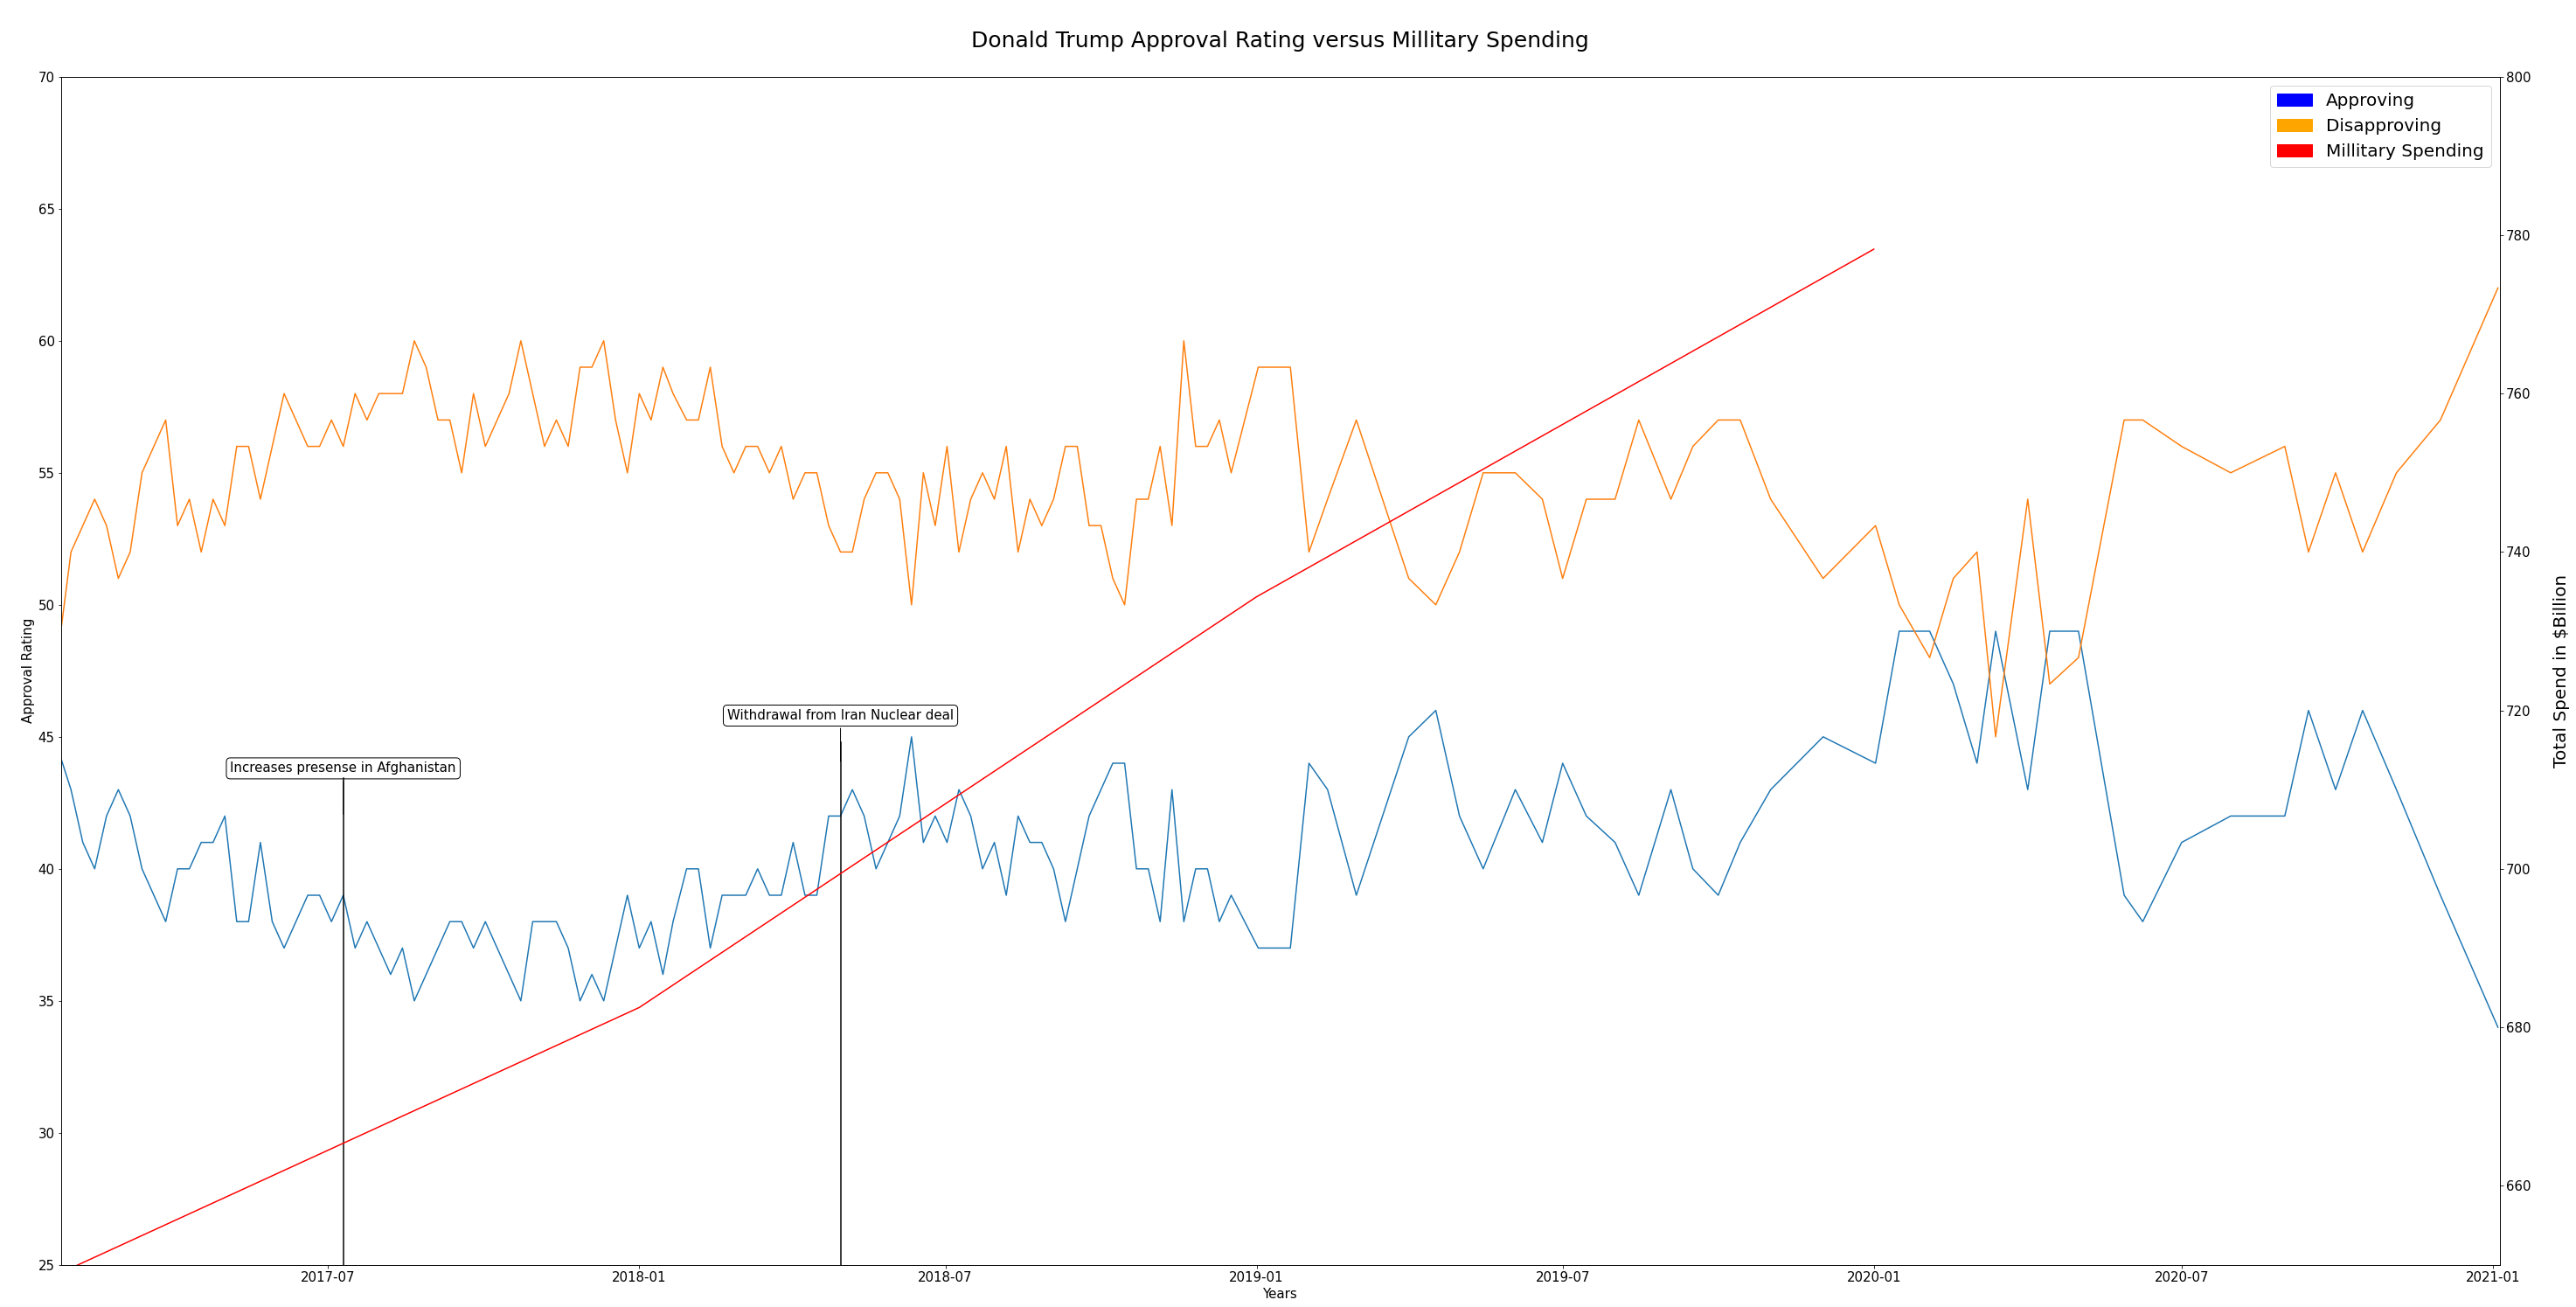

In [594]:
trumpPLOT()

In [595]:
USDPercap = perCapita[["USA"]]
usdBush = currentUSD[['USA']]
bushWAx = bushWApproval[['Approving']]
obamaAx = obamaApproval[['Approving']]
trumpAx = trumpApproval[['Approving']]
clintonAx = Clinton[['Approving']]
bushAx = gBush[['Approving']]
bushDIS = bushWApproval[['Disapproving']]
obamaDIS = obamaApproval[['Disapproving']]
trumpDISS = trumpApproval[['Disapproving']]

In [602]:
def bbt():
    fig,ax = plt.subplots()

    ##Bush W approval rating
    ax.plot(bushWAx, color='red')
    #plt.ylim([300000, 80000])
    ax.set_xlabel("Year",fontsize=20)
    ax.set_ylabel("Approval Rating", color="black", fontsize=20)

    ax.plot(obamaAx, color="blue")
    plt.axvline(x=pd.Timestamp("01-20-2009"), color='black', ymin=0.155, ymax=0.635)

    ax.plot(trumpAx, color='red')
    plt.axvline(x=pd.Timestamp("01-25-2017"), color='black', ymin=0.3, ymax=0.52)

    ax2 = ax.twinx()
    ax2.plot(curUS, color="purple")
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    ax2.set_ylim(300000, 800000)
    ax2.set_ylabel("\nSpending in $Billion", size=15)

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)


    plt.xlim([pd.Timestamp("02/02/2001"), pd.Timestamp("01/01/2020")])
    plt.grid()
    plt.title("Bush, Obama and Trump Approval Rating versus Military Spending\n", size=15)
    #LEGEND
    BUSH = mpatches.Patch(color='red', label='Bush Approval Rating')
    OBAMA = mpatches.Patch(color='blue', label='Obama Approval Rating')
    TRUM = mpatches.Patch(color='red', label='Trump Approval Rating')
    SPEND = mpatches.Patch(color='purple', label='Millitary Spending')
    plt.legend(handles=[BUSH,OBAMA,TRUM,SPEND], loc='upper right', prop={'size': 20})



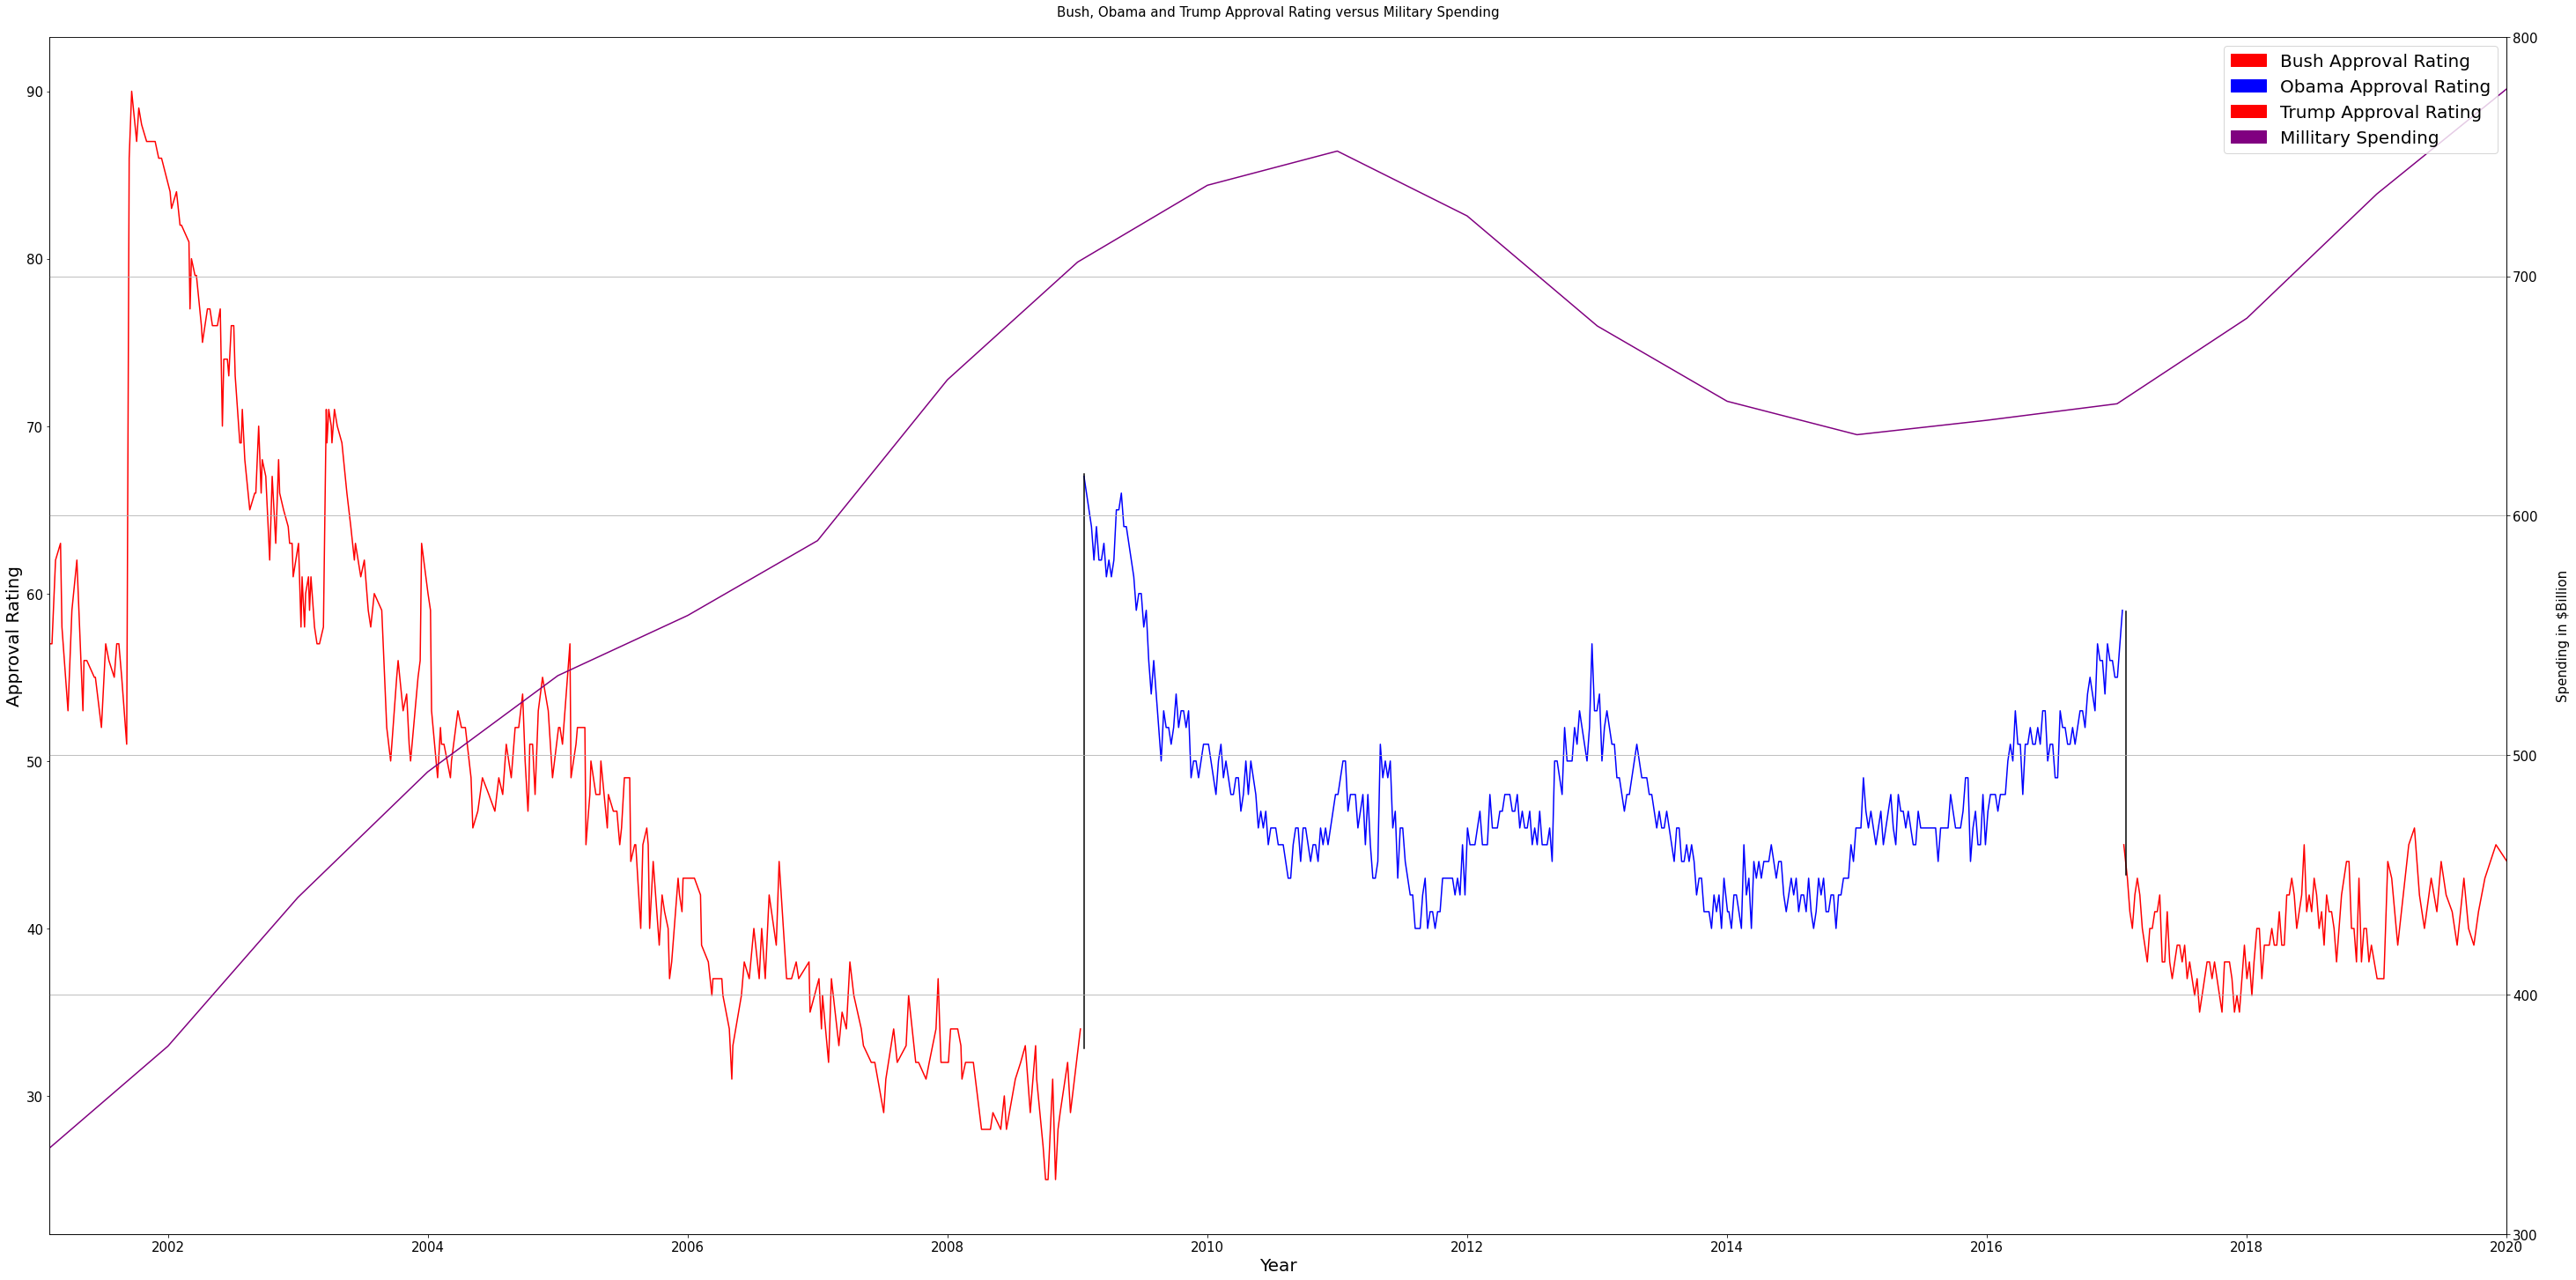

In [603]:
bbt()

In [604]:
def bbtDISS():
    fig,ax = plt.subplots()

    ##Bush W approval rating
    ax.plot(bushDIS, color='red')
    #plt.ylim([300000, 80000])
    ax.set_xlabel("Year",fontsize=20)
    ax.set_ylabel("Disapproval Rating", color="black", fontsize=20)

    ax.plot(obamaDIS, color="blue")
    plt.axvline(x=pd.Timestamp("01-20-2009"), color='black', ymin=0.819, ymax=0.15)

    ax.plot(trumpDISS, color='red')
    plt.axvline(x=pd.Timestamp("01-25-2017"), color='black', ymin=0.7, ymax=0.5)

    ax2 = ax.twinx()
    ax2.plot(curUS, color="purple")
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    ax2.set_ylim(300000, 800000)
    ax2.set_ylabel("\nSpending in $Billion", size=15)


    plt.xlim([pd.Timestamp("02/02/2001"), pd.Timestamp("12/29/2020")])
    plt.grid()
    plt.title("Bush, Obama and Trump Disapproval Rating versus Military Spending\n", size=25)

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)
    
    #LEGEND
    BUSH = mpatches.Patch(color='red', label='Bush Disapproval Rating')
    OBAMA = mpatches.Patch(color='blue', label='Obama Disapproval Rating')
    TRUM = mpatches.Patch(color='red', label='Trump Disapproval Rating')
    SPEND = mpatches.Patch(color='purple', label='Millitary Spending')
    plt.legend(handles=[BUSH,OBAMA,TRUM,SPEND], prop={'size': 20})


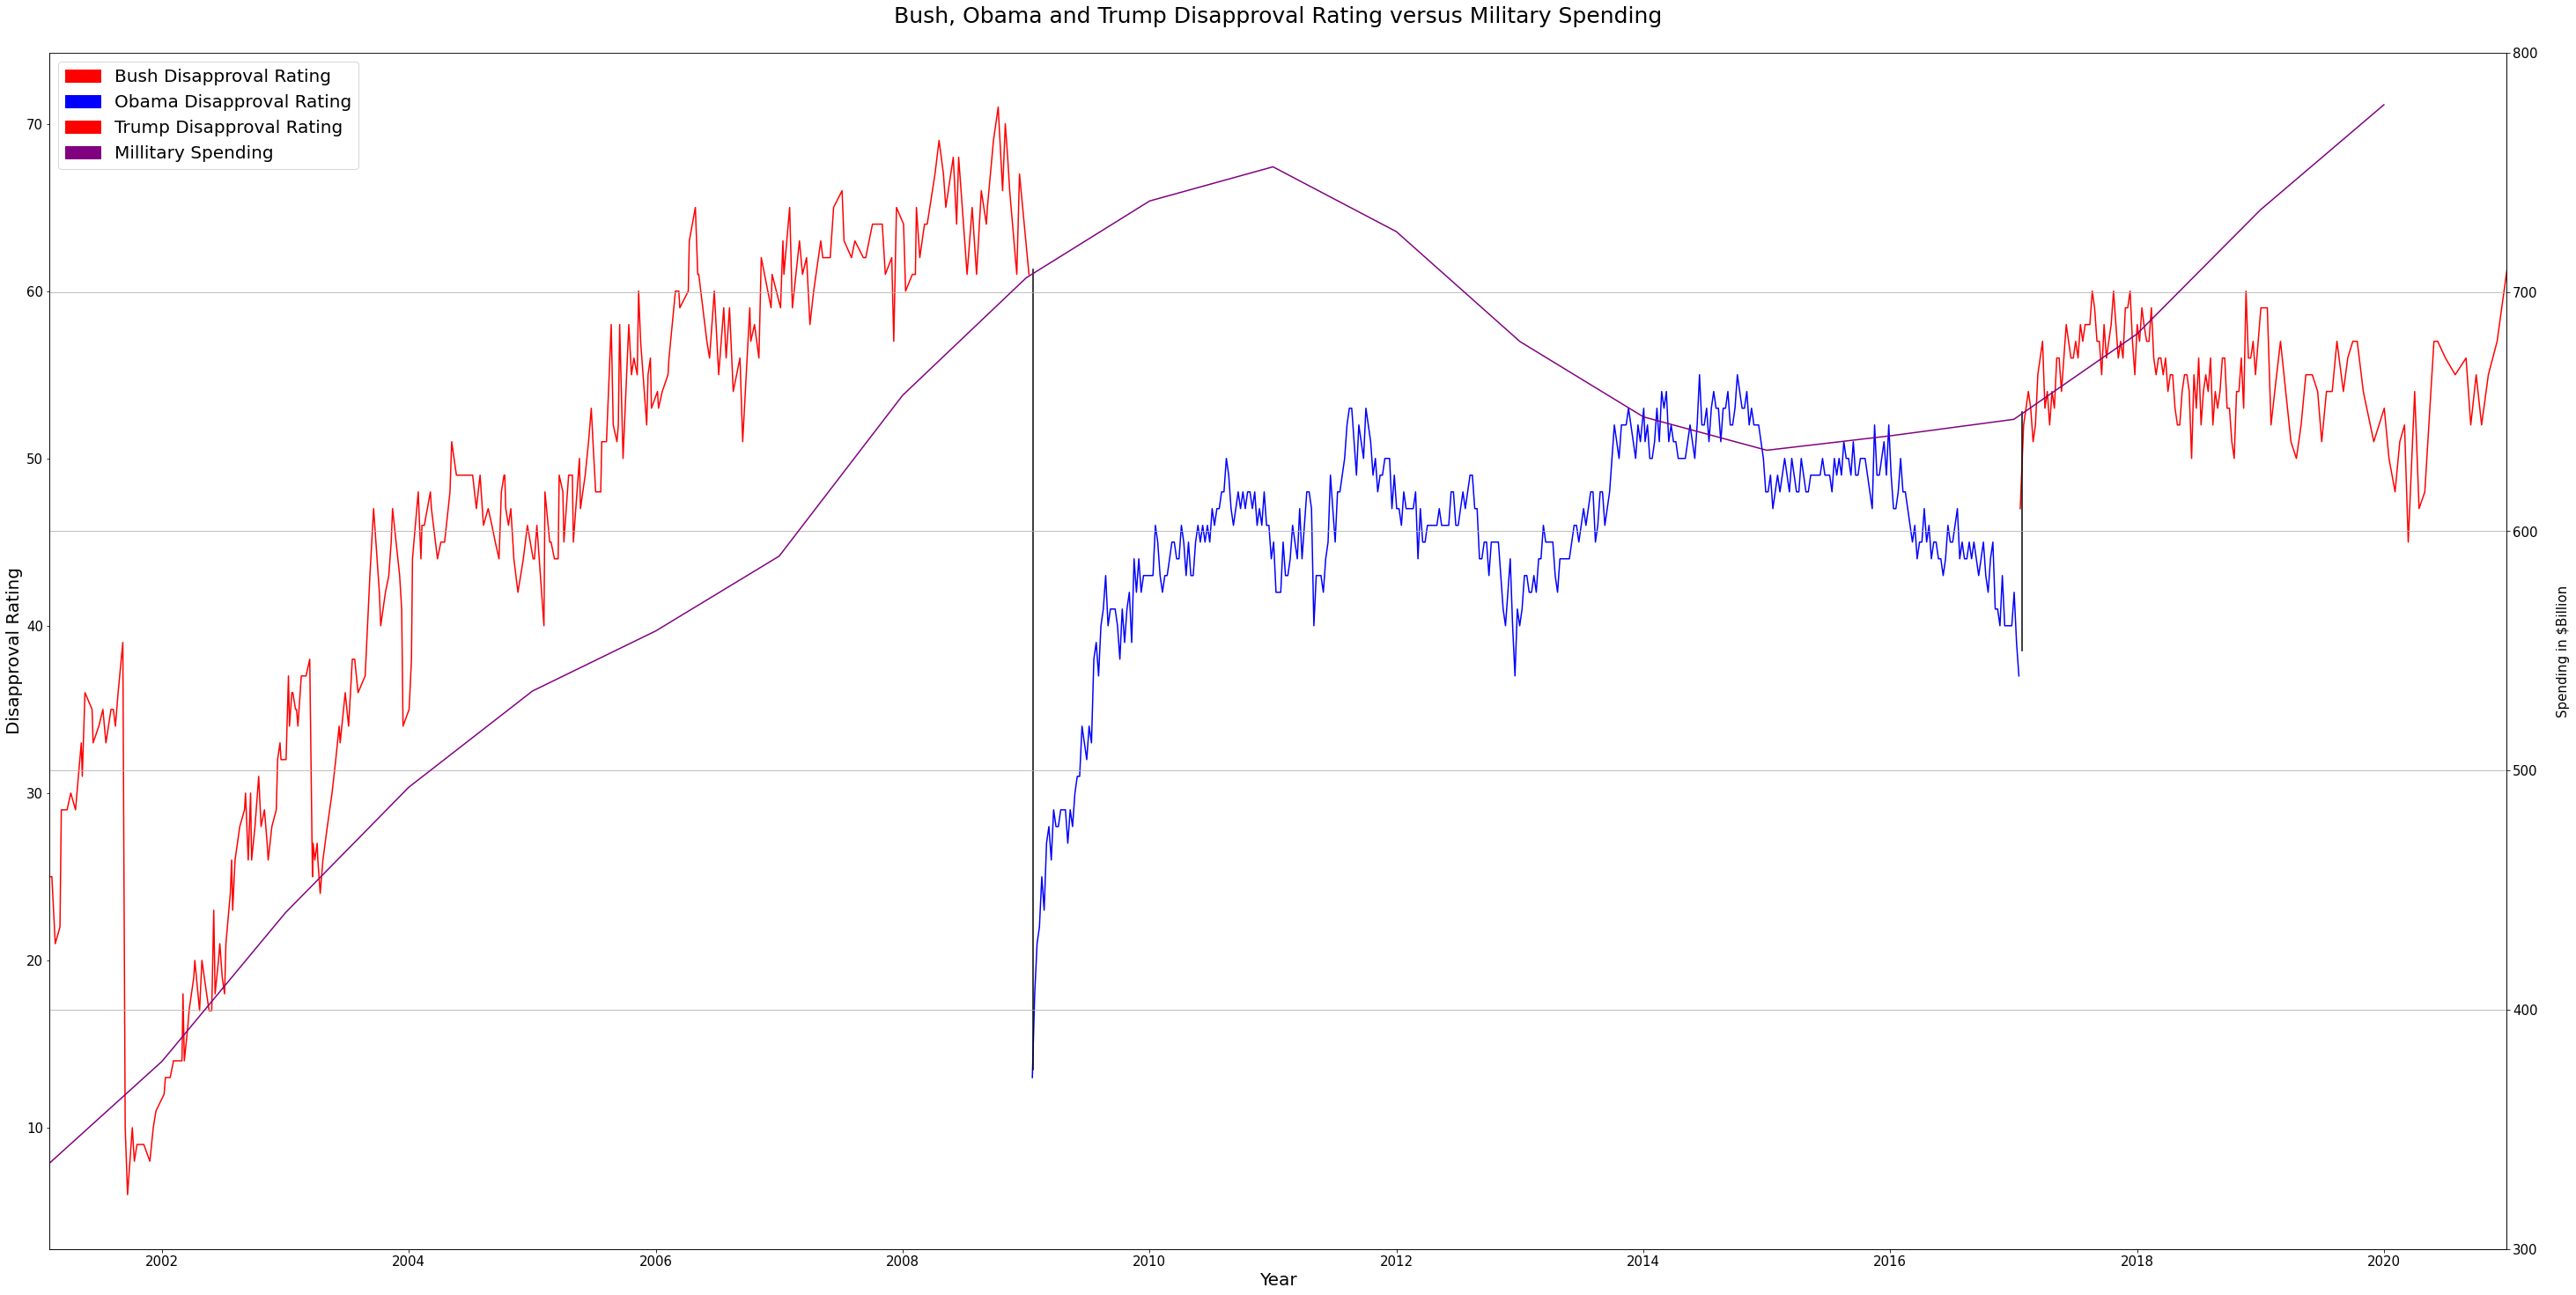

In [605]:
bbtDISS()

In [600]:
def bbDISS():
    
    fig,ax = plt.subplots()

    ##Bush
    ax.plot(bushDIS, color='red')
    ax.set_xlabel("Year",fontsize=20)
    ax.set_ylabel("\nDisapproval Rating",color="black",fontsize=20)

    #Obama 
    ax.plot(obamaDIS, color="blue")

    #SPENDING
    ax2 = ax.twinx()
    ax2.plot(curUS, color='purple')
    ax2.set_ylabel("\nTotal Spending in $Billion", size=20)
    ax2.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x/1000), ',')))
    ax2.set_ylim(300000, 800000)

    #DATE RANGE AND LINE
    plt.xlim([pd.Timestamp('2001-01-01'), pd.Timestamp('2016-01-01')])
    plt.axvline(x=pd.Timestamp("01-20-2009"), color='black', ymin=0.14, ymax=0.82)
    plt.title('Bush and Obama Disapproval rating versus total Millitary Spending \n', size=25)

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)

    #LEGEND
    BUSH = mpatches.Patch(color='red', label='Bush Disapproval Rating')
    OBAMA = mpatches.Patch(color='blue', label='Obama Disapproval Rating')
    SPEND = mpatches.Patch(color='purple', label='Millitary Spending')
    plt.legend(handles=[BUSH,OBAMA,SPEND], prop={'size': 20})
    plt.show()


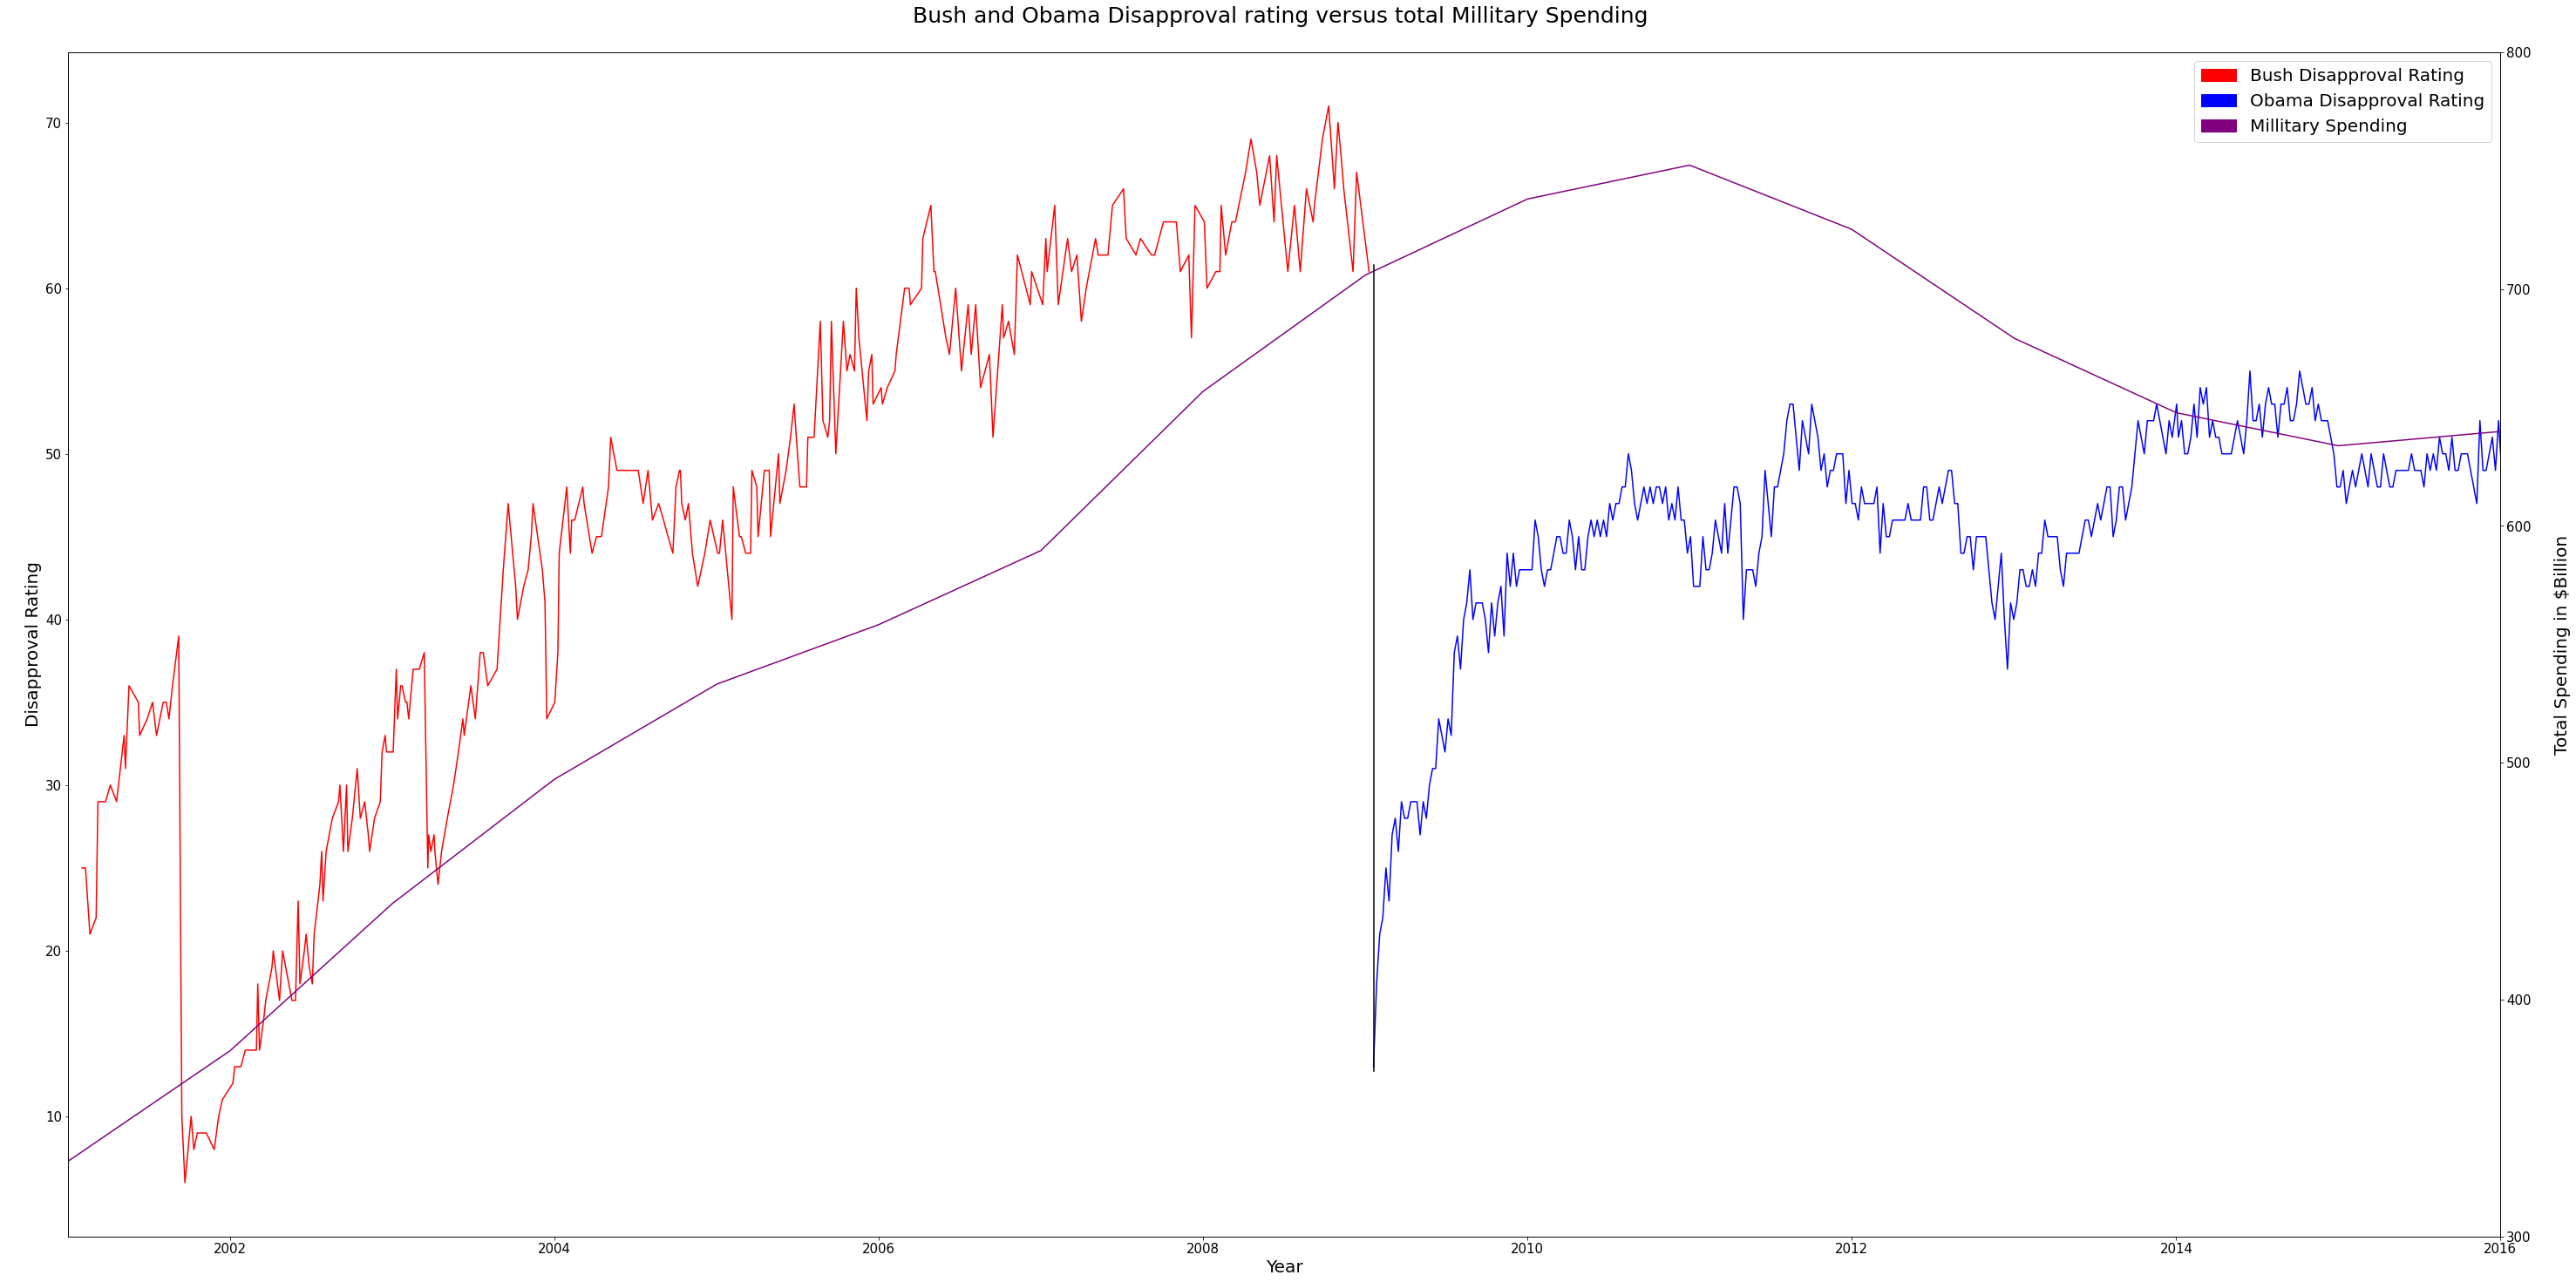

In [601]:
bbDISS()

# Conclusion 